# 900_RQ2_Analysis
## Purpose 
Final analysis of our Reseach Question 2  
## Datasets 
* _Input_: RQ2.csv
* _Output_: N/A

# Homegrown vs Foreign
### Do homegrown players generally perform the best in their respective leagues or are they inferior to their foreign counterparts players? 

### Are their any reoccuring trends?
### Can we spot any trends in the nationalities of players playing in leagues?
### Are the results reflected in FIFA's ratings?<br><br><br>

### Prerequisites:
We define a:
* **Homegrown/Foreign** - is a boolean column. If true it signifies a player who is playing in a league in their home country. ie: An English Player Playing in England.<br><br>
* **Home/Abroad** - is a boolean column. If true contains all players that live in the location of the Top 5 Leagues (England,France,Italy,Spain,Germany) that play in one of the other Top 5 Leagues in these locations.  Examples: <br> A French player playing in Germany is said to be an Abroad player. <br> A Home player is the same as a homegrown player, ie: A French player playing in France.<br><br>

The **def** below allows you to display two dataframes beside eachother.<br>Found on *https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side/38801975*

In [1]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import folium
from folium import plugins
import seaborn as sns
import matplotlib.image as mpimg

%matplotlib inline

#### Reading in our RQ2 dataset.

In [3]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

#### Quick glance at the dataframe.

In [4]:
RQ2.head(5)

,Players,Position,league,age,nationality,overall,photo,skill_moves,pac,def,...,eur_wage,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Aaron Cresswell,Defender,English Premier League,27.0,England,76.0,https://cdn.sofifa.org/18/players/189615.png,2.0,76.0,73.0,...,83000.0,True,False,0.980198,0.039604,101.0,2.821782,0.039604,0.099010,0.247525
2,Aaron Hughes,Defender,Scottish Premiership,37.0,Northern Ireland,71.0,https://cdn.sofifa.org/18/players/17725.png,2.0,23.0,72.0,...,5000.0,False,False,0.918919,0.000000,37.0,1.216216,0.000000,0.000000,0.162162
3,Aaron Hunt,Midfielder,German Bundesliga,30.0,Germany,76.0,https://cdn.sofifa.org/18/players/158138.png,3.0,68.0,39.0,...,38000.0,True,False,0.788136,0.279661,118.0,3.050847,0.211864,0.118644,0.000000
4,Aaron Lennon,Midfielder,English Premier League,30.0,England,77.0,https://cdn.sofifa.org/18/players/152747.png,3.0,83.0,38.0,...,97000.0,True,False,0.808333,0.391667,120.0,2.633333,0.100000,0.125000,0.000000
5,Aaron Leya Iseka,Forward,Belgian First Division A,19.0,Belgium,68.0,https://cdn.sofifa.org/18/players/223929.png,3.0,79.0,21.0,...,9000.0,False,False,0.375000,0.375000,8.0,2.125000,0.000000,0.250000,0.000000


# Who Performs Better vs Who Is Better Rated ?

# Nationalities

### Creating Best Performing Nations Dataframe:
* Considering players from the Top 5 league's home countries. **Germany, England, Italy, Spain, France**.
* Using the groupby function by nationality finding the **Average Form** for each country.
* Sorting the values in descending order.

In [5]:
best_preforming = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_preforming = best_preforming.groupby(['nationality']).mean()[['Average Form']].sort_values('Average Form', ascending=True)
best_preforming

,Average Form
nationality,
Italy,1.909542
England,1.975277
Spain,2.015500
Germany,2.033658
France,2.152259


### Creating Best Overall Nations Dataframe:
* Considering players from the Top 5 league's home countries. **Germany, England, Italy, Spain, France**.
* Using the groupby function by nationality finding the **Overall** for each country.
* Re-index dataframe to match the order of Best Performing Nationalities for graph.

In [6]:
best_rated = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_rated = best_rated.groupby(['nationality']).mean()[['overall']]
best_rated = best_rated.reindex(['Italy','England','Spain','Germany','France'])

## Best Performing Nationalities vs Best Overall Nationalities
* Using the two dataframes **'best_performing'** and **'best_rated'**.
* Assign a colour to each nation corresponding with the main colour of their Domestic League in real life.
* Sharing the y axis to represent both graphs side by side.

### Findings:
* **French players are** extrememly **underrated** in general. 
* **German** and **English players are accurately rated**.
* **Spanish** and **Italian players are** extrememly **overrated** in general.

#### Why are FIFA's ratings so inaccurate?

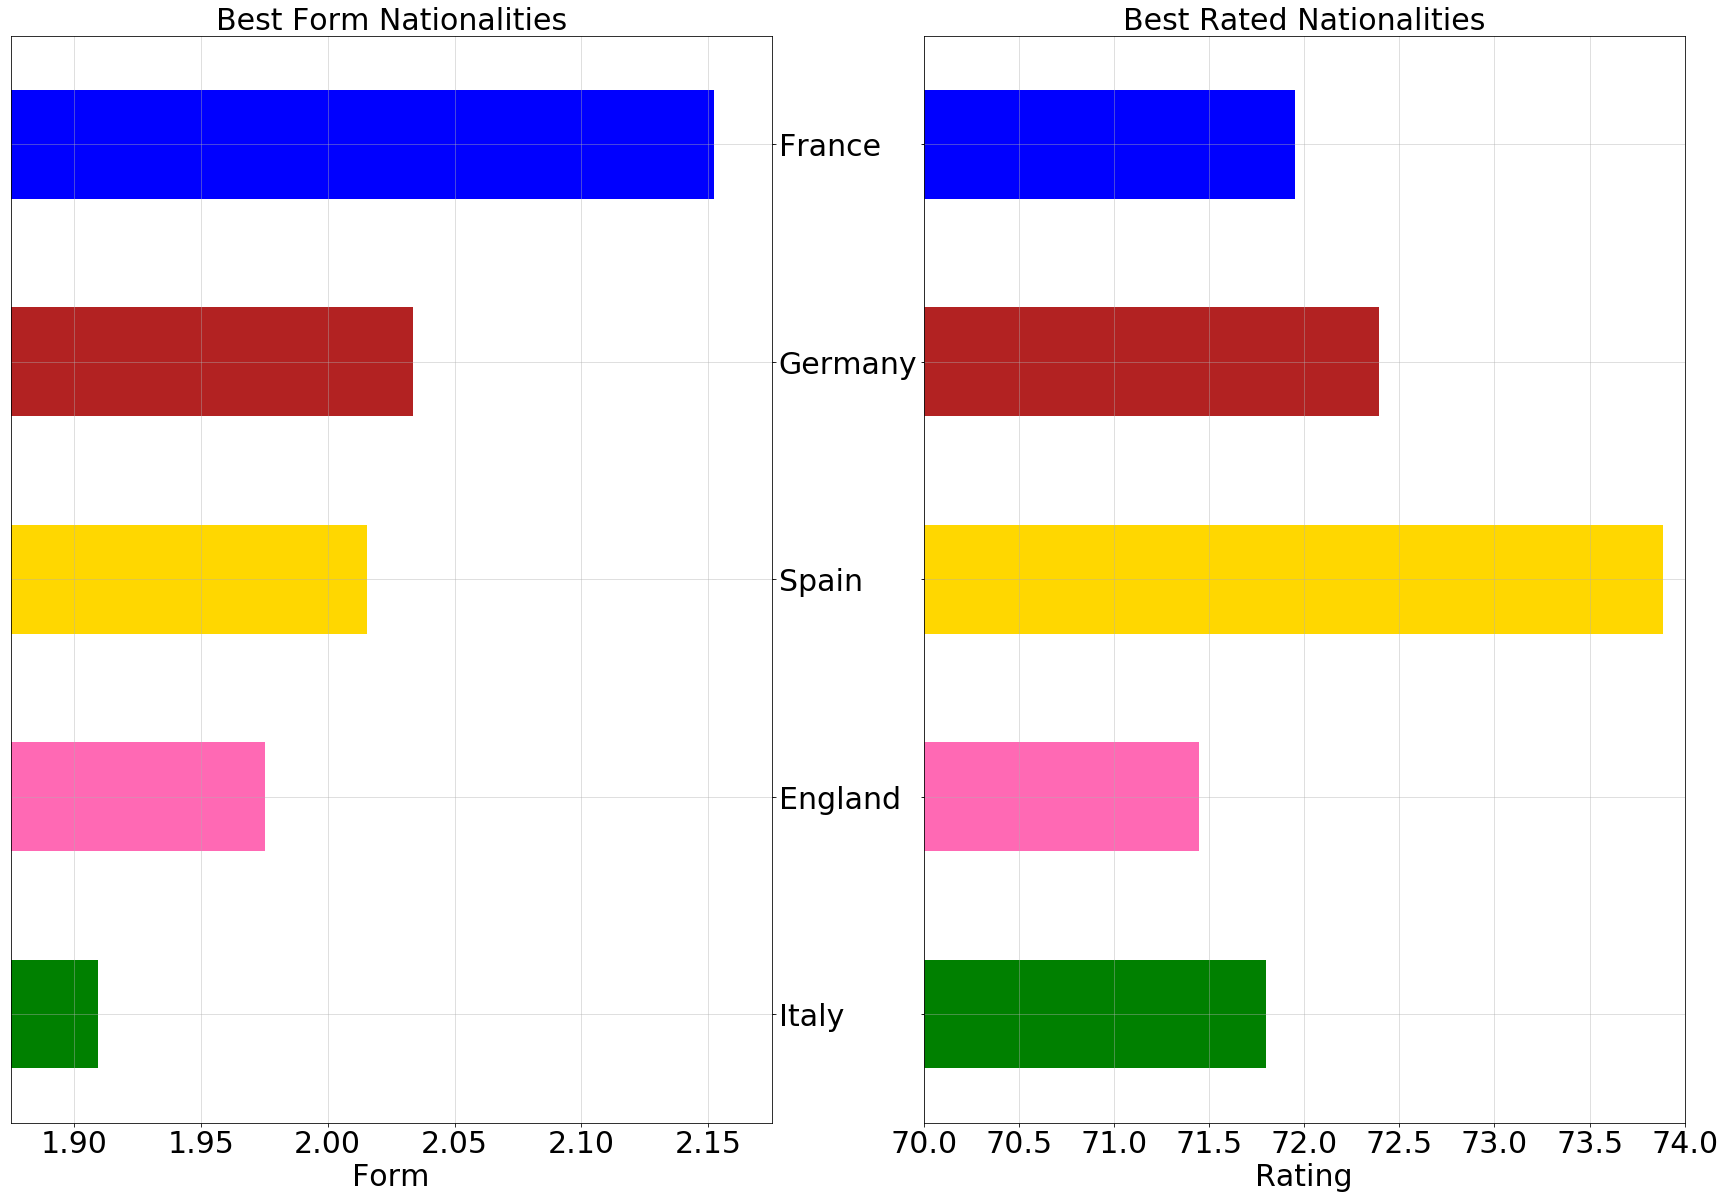

In [7]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(30,20))

ax.yaxis.tick_right()

best_preforming.plot(legend=False, ax=ax,kind='barh',color=[['green','hotpink','gold','firebrick','blue']])
ax.set_xlim([1.875,2.175])
ax.set_title('Best Form Nationalities',size=30)
ax.set_xlabel('Form',size=30)
ax.set_ylabel('')
ax.grid(True,alpha=0.5)

best_rated.plot(ax=ax2,kind='barh',color=[['green','hotpink','gold','firebrick','blue']])
ax2 = plt.gca()
ax2.set_xlim([70,74])
ax2.grid(True,alpha=0.5)
ax2.set_title('Best Rated Nationalities',size=30)
ax2.set_xlabel('Rating',size=30)
ax2.set_ylabel('')
ax2.legend_.remove()


plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=30)
plt.setp(ax2.get_xticklabels(), rotation='horizontal', fontsize=30)
plt.setp(ax.get_yticklabels(), fontsize=30)
plt.show()

# Leagues

### Creating Best Performing League Dataframe:
* Considering players from the Top 5 league's. **English Premier League, German Bundesliga, Spanish Primera Division, French Ligue 1, Italian Serie A**.
* Using the groupby function by nationality finding the **Average Form** for each league.
* Sorting the values in descending order.

In [8]:
best_preforming_league = RQ2.loc[RQ2['league'].isin(['English Premier League','German Bundesliga','Spanish Primera Division','French Ligue 1','Italian Serie A'])]
best_preforming_league = best_preforming_league.groupby(['league']).mean()[['Average Form']].sort_values('Average Form', ascending=True)
best_preforming_league

,Average Form
league,
Italian Serie A,2.237702
French Ligue 1,2.294949
Spanish Primera Division,2.349447
German Bundesliga,2.390854
English Premier League,2.472870


### Creating Best Overall League Dataframe:
* Considering players from the Top 5 league's. **English Premier League, German Bundesliga, Spanish Primera Division, French Ligue 1, Italian Serie A**.
* Using the groupby function by nationality finding the **Overall** for each league.
* Re-index dataframe to match the order of Best Performing Nationalities for graph.

In [9]:
best_rated_league = RQ2.loc[RQ2['league'].isin(['English Premier League','German Bundesliga','Spanish Primera Division','French Ligue 1','Italian Serie A'])]
best_rated_league = best_rated_league.groupby(['league']).mean()[['overall']]
best_rated_league = best_rated_league.reindex(['Italian Serie A','French Ligue 1','Spanish Primera Division','German Bundesliga','English Premier League'])
best_rated_league


,overall
league,
Italian Serie A,74.636816
French Ligue 1,72.950000
Spanish Primera Division,76.673846
German Bundesliga,75.070270
English Premier League,76.445221


## Best Performing Leagues vs Best Overall Leagues
* Using the two dataframes **'best_performing_league'** and **'best_rated_league'**.
* Assign a colour to each league corresponds with the main colour of their Domestic League in real life.
* Sharing the y axis to represent both graphs side by side.

### Findings:
* FIFA seems to be more accurate with league ratings.
* Both the **German** and **English** domestic leagues seem faily represented.
* The pattern of **French** league being underrated can be seen again.
* The same occurs with the **Spanish** league being overrated.

### These inaccuracies we believe could be attriubuted to the Spanish League being more difficult than the French in general.<br>Hence if a player is performing lower in the Spanish League they would probably perform better in the French League

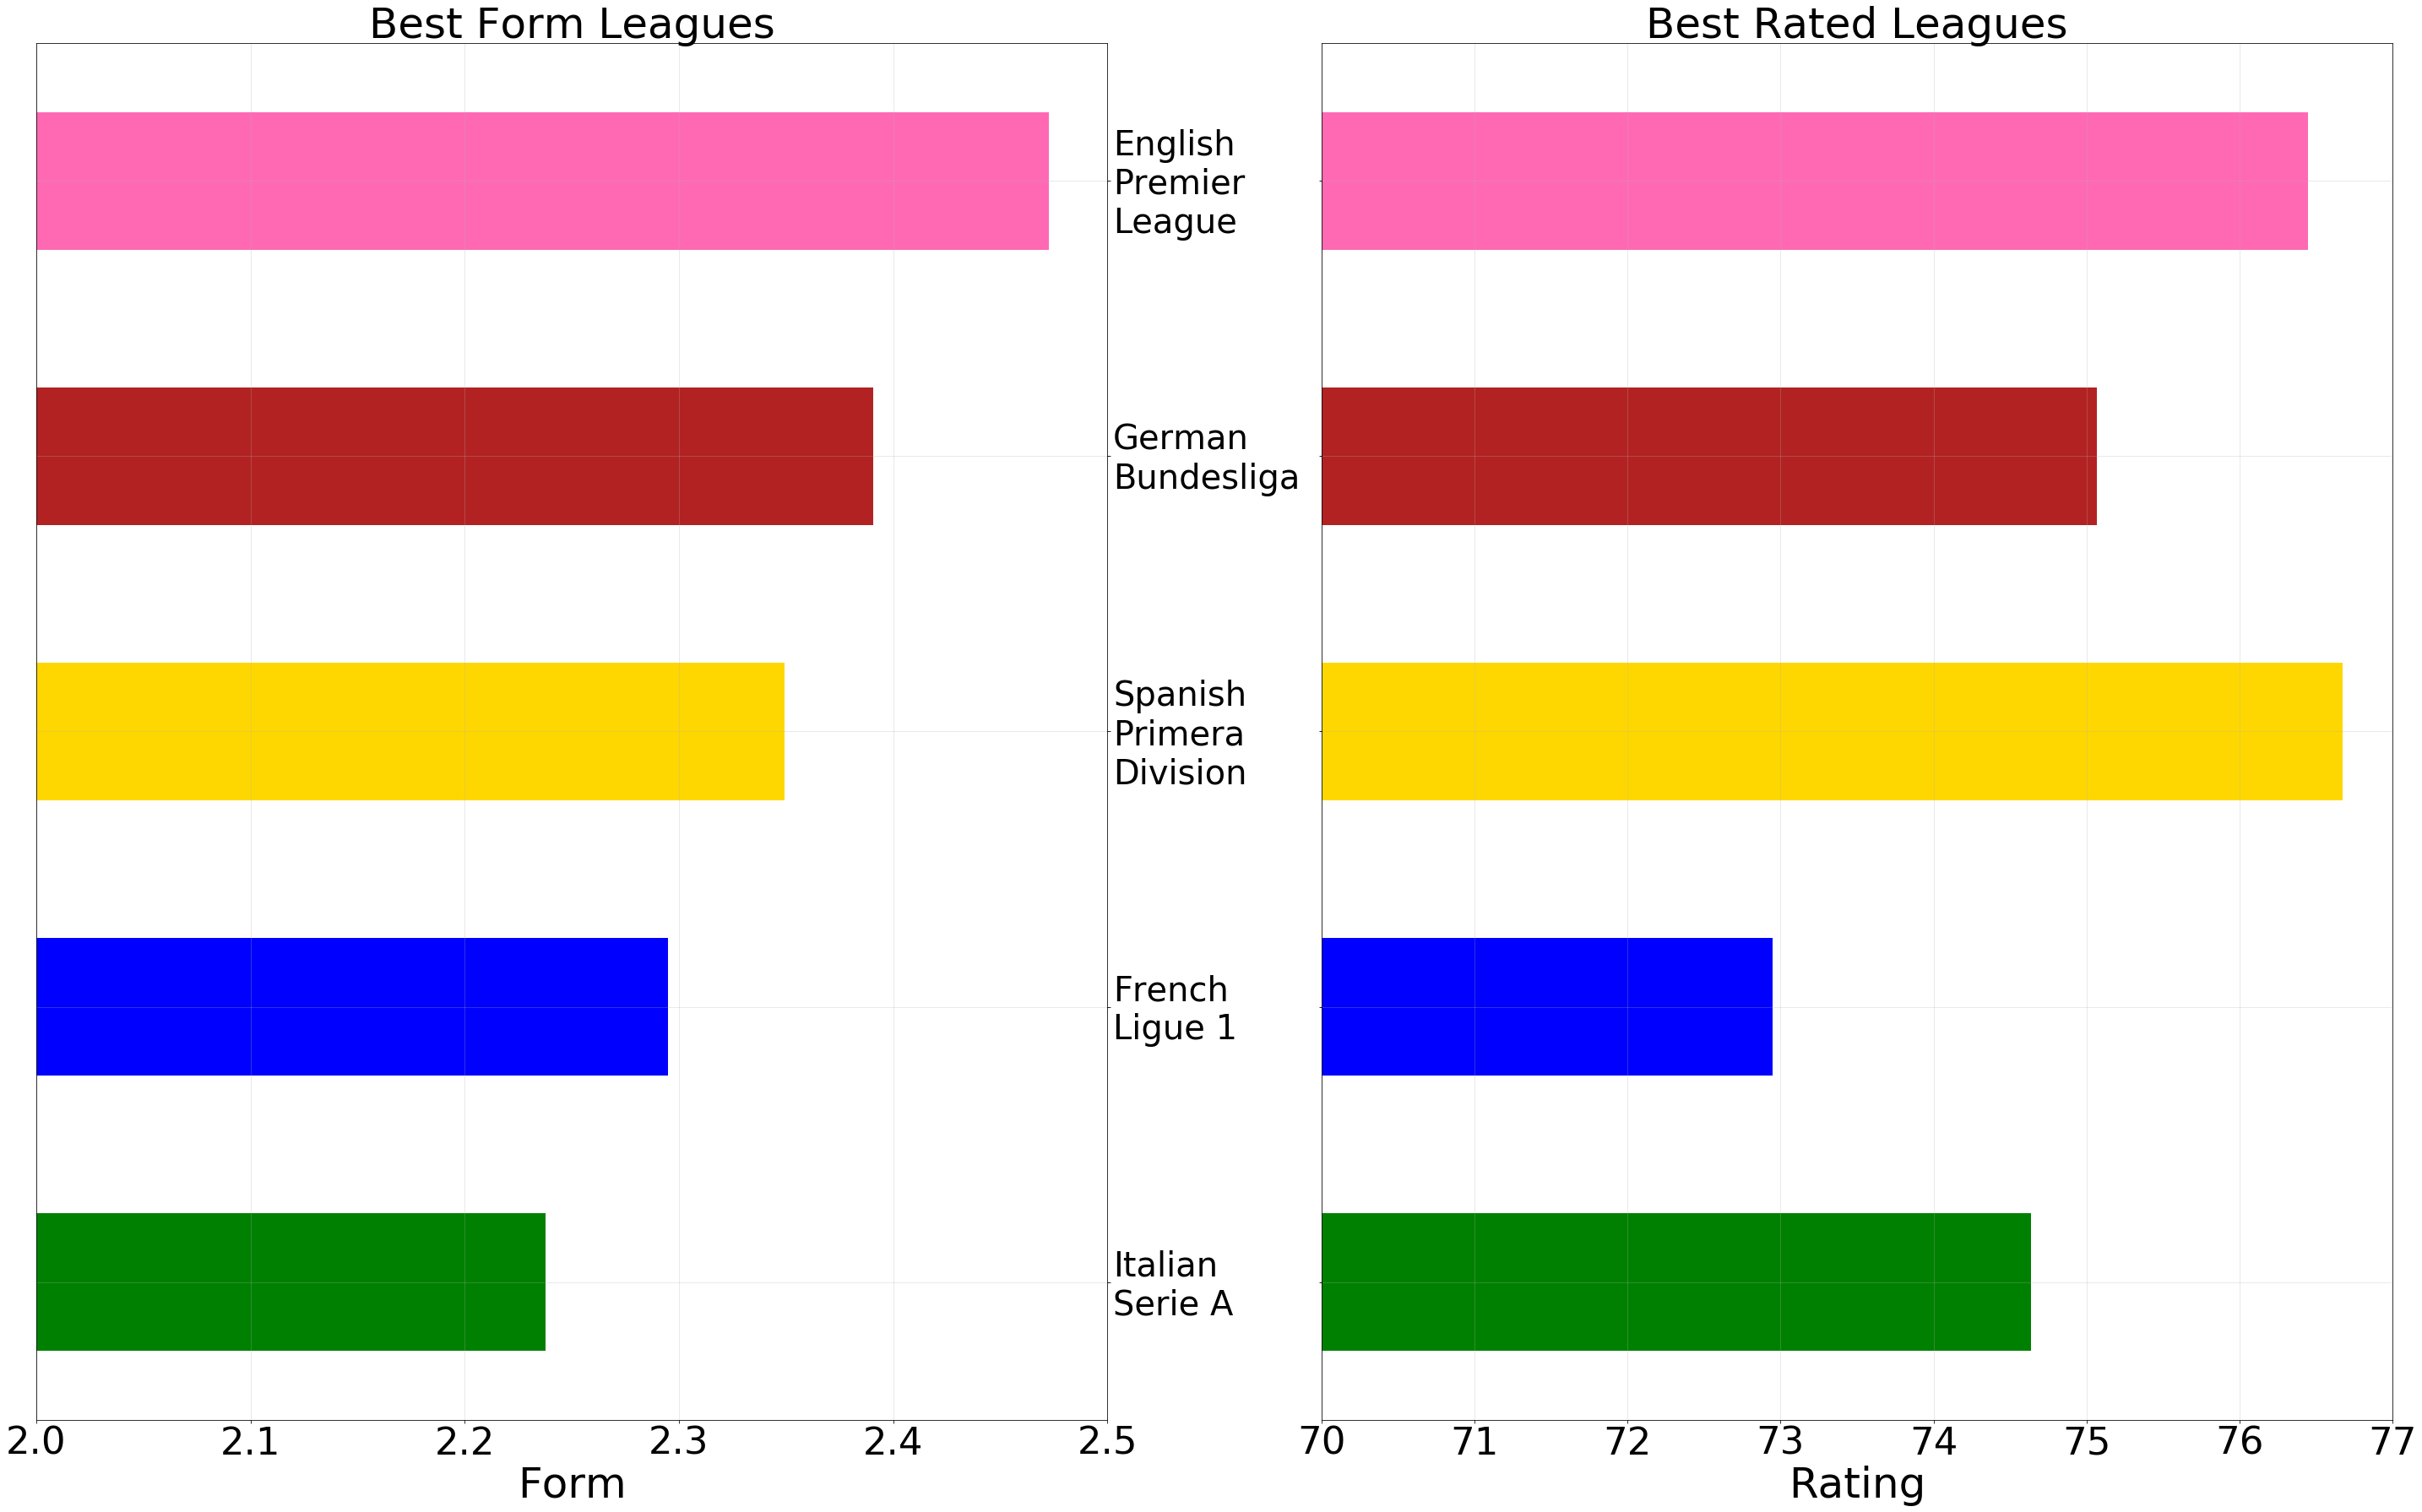

In [10]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(50,30))

ax.yaxis.tick_right()

best_preforming_league.plot(legend=False, ax=ax,kind='barh',color=[['green','blue','gold','firebrick','hotpink']])
ax.set_xlim([2,2.5])
ax.set_title('Best Form Leagues',size=50)
ax.set_xlabel('Form',size=50)
ax.set_ylabel('')
ax.grid(True,alpha=0.35)

best_rated_league.plot(ax=ax2,kind='barh',color=[['green','blue','gold','firebrick','hotpink']])
ax2 = plt.gca()
ax2.set_xlim([70,77])
ax2.grid(True,alpha=0.35)
ax2.set_title('Best Rated Leagues',size=50)
ax2.set_xlabel('Rating',size=50)
ax2.set_ylabel('')
ax2.legend_.remove()
ax2.set_yticklabels(['Italian\nSerie A','French\nLigue 1','Spanish\nPrimera\nDivision','German\nBundesliga','English\nPremier\nLeague'])

plt.setp(ax.get_xticklabels(), fontsize=45)
plt.setp(ax2.get_xticklabels(), fontsize=45)
plt.setp(ax.get_yticklabels(), fontsize=40)
plt.show()

# <br><br>What percentage of players are Homegrown/Foreign in each league?

#### Seperating players in dataframes
* Only considering players in the Top 5 leagues
* Homegrown player dataframe for each league
* Foreign player dataframe for each league

In [11]:
EPL = RQ2.loc[RQ2.league=='English Premier League']
BUN = RQ2.loc[RQ2.league=='German Bundesliga']
LAL = RQ2.loc[RQ2.league=='Spanish Primera Division']
L1 = RQ2.loc[RQ2.league=='French Ligue 1']
SEI = RQ2.loc[RQ2.league=='Italian Serie A']

Homegrown_EPL = EPL.loc[EPL.Homegrown==True]
Foreign_EPL = EPL.loc[EPL.Homegrown==False]

Homegrown_BUN = BUN.loc[BUN.Homegrown==True]
Foreign_BUN = BUN.loc[BUN.Homegrown==False]

Homegrown_LAL = LAL.loc[LAL.Homegrown==True]
Foreign_LAL = LAL.loc[LAL.Homegrown==False]

Homegrown_L1 = L1.loc[L1.Homegrown==True]
Foreign_L1 = L1.loc[L1.Homegrown==False]

Homegrown_SEI = SEI.loc[SEI.Homegrown==True]
Foreign_SEI = SEI.loc[SEI.Homegrown==False]

Finding the length of each dataframe and putting them in a new dataframe **'count'**
* Create a new column Total conatining the total number of Homegrown and Foreign players.

In [12]:
HEPL = len(Homegrown_EPL)
HBUN = len(Homegrown_BUN)
HLAL = len(Homegrown_LAL)
FEPL = len(Foreign_EPL)
FBUN = len(Foreign_BUN)
FLAL = len(Foreign_LAL)
HL1 = len(Homegrown_L1)
HSEI = len(Homegrown_SEI)
FL1 = len(Foreign_L1)
FSEI = len(Foreign_SEI)


columns = ['Homegrown','Foreign']
count = pd.DataFrame(columns=columns)
count = count.fillna(0) # with 0s rather than NaNs
count['Homegrown']=HEPL,HBUN,HLAL,HL1,HSEI
count['Foreign']=FEPL,FBUN,FLAL,FL1,FSEI
count = count.transpose()
count.columns = ['EPL', 'BUN','LAL','L1','SEI']
count['Total'] = count.sum(axis=1)

count

,EPL,BUN,LAL,L1,SEI,Total
Homegrown,150,189,167,204,196,906
Foreign,279,181,158,176,206,1000


## Findings
* Only **35%** of players in the English Premier League are Homegrown.
* Every other league seem to have an even balance close to **50/50**.<br><br>
**Why does the English Premier League have such a small percentage of Homegrown players to other leagues?**

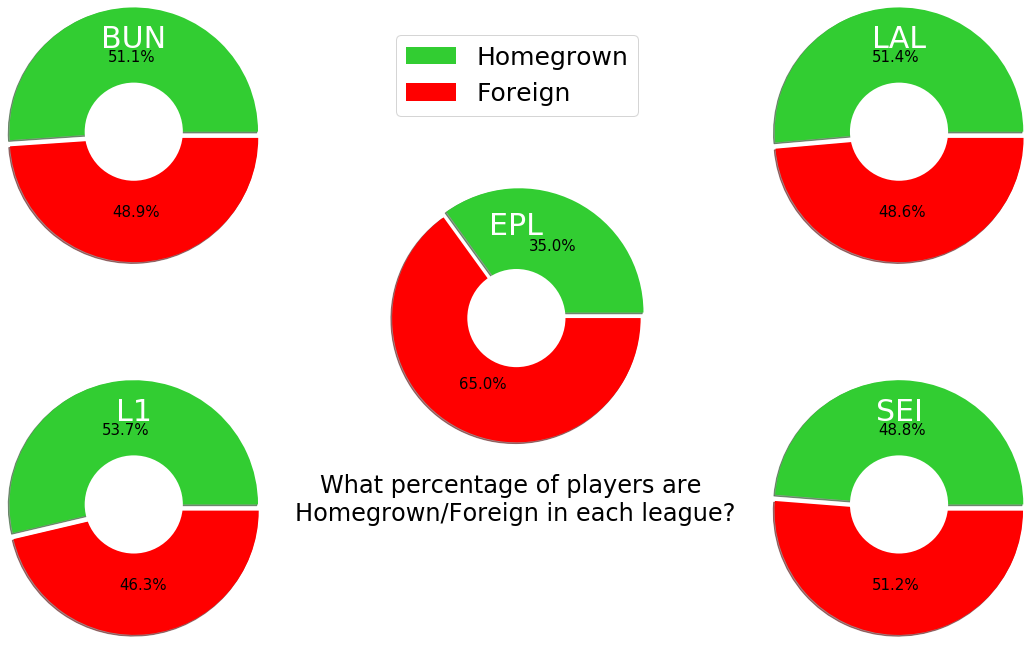

In [13]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

count.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count['EPL'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('EPL',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['BUN'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('BUN',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['LAL'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('LAL',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['L1'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('L1',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['SEI'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('SEI',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
plt.legend(bbox_to_anchor=(-2.1, 3.5, 1., .102),prop={'size':25},labels=count.index)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.suptitle('What percentage of players are \nHomegrown/Foreign in each league?',y=0.2,x=0.445, fontsize=24, fontweight='light')

fig.savefig('../../data/analysis/Homegrown vs Foreign Leagues.png')

# What percentage of players are Home/Abroad in each country?

#### Seperating players in dataframes
* Only considering players in the Top 5 leagues
* Home player dataframe for each league
* Abroad player dataframe for each league

In [14]:
ENG = RQ2.loc[RQ2.nationality=='England']
GER = RQ2.loc[RQ2.nationality=='Germany']
SPA = RQ2.loc[RQ2.nationality=='Spain']
FRA = RQ2.loc[RQ2.nationality=='France']
ITA = RQ2.loc[RQ2.nationality=='Italy']

Abroad_ENG = ENG.loc[ENG.Abroad==True]
Home_ENG = ENG.loc[ENG.Abroad==False]

Abroad_GER = GER.loc[GER.Abroad==True]
Home_GER = GER.loc[GER.Abroad==False]

Abroad_SPA = SPA.loc[SPA.Abroad==True]
Home_SPA = SPA.loc[SPA.Abroad==False]

Abroad_FRA = FRA.loc[FRA.Abroad==True]
Home_FRA = FRA.loc[FRA.Abroad==False]

Abroad_ITA = ITA.loc[ITA.Abroad==True]
Home_ITA = ITA.loc[ITA.Abroad==False]

Finding the length of each dataframe and putting them in a new dataframe **'count1'**
* Create a new column Total conatining the total number of Home and Abroad players.

In [15]:
AENG = len(Abroad_ENG)
AGER = len(Abroad_GER)
AFRA = len(Abroad_FRA)
HENG = len(Home_ENG)
HGER = len(Home_GER)
HFRA = len(Home_FRA)
ASPA = len(Abroad_SPA)
AITA = len(Abroad_ITA)
HSPA = len(Home_SPA)
HITA = len(Home_ITA)


columns = ['Abroad','Home']
count1 = pd.DataFrame(columns=columns)
count1 = count1.fillna(0) # with 0s rather than NaNs
count1['Abroad']=AENG,AGER,ASPA,AFRA,AITA
count1['Home']=HENG,HGER,HSPA,HFRA,HITA
count1 = count1.transpose()
count1.columns = ['ENG', 'GER','SPA','FRA','ITA']
count1['Total'] = count1.sum(axis=1)

count1

,ENG,GER,SPA,FRA,ITA,Total
Abroad,1,21,40,75,19,156
Home,298,323,282,380,350,1633


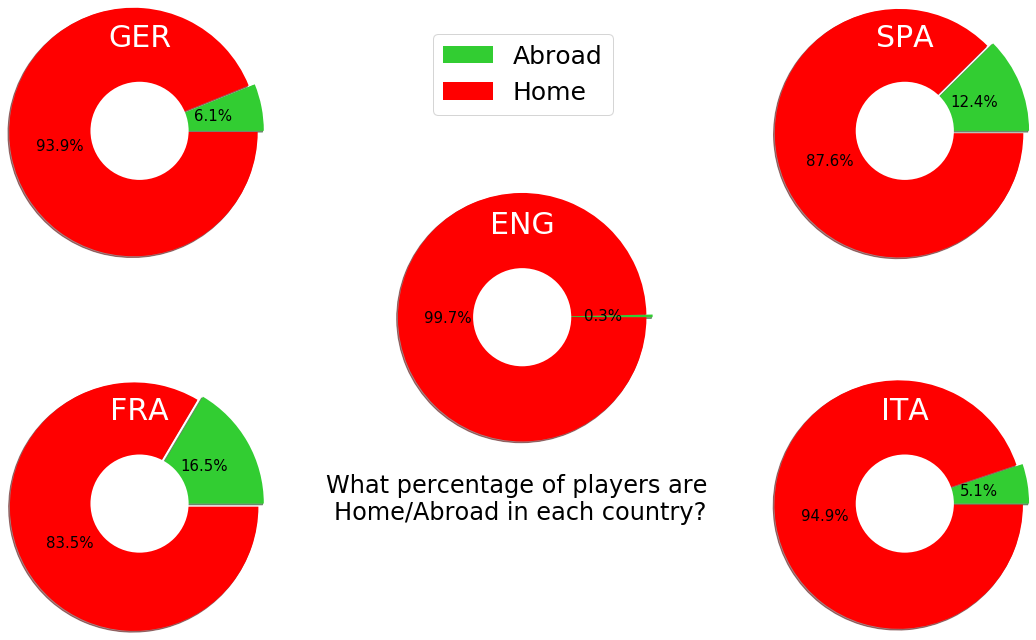

In [16]:
the_grid = GridSpec(6,6)

count1.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count1['ENG'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('ENG',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count1['GER'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('GER',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count1['SPA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('SPA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count1['FRA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('FRA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count1['ITA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('ITA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
plt.legend(bbox_to_anchor=(-2.3, 3.5, 1., .102),prop={'size':25},labels=count1.index)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.suptitle('What percentage of players are \nHome/Abroad in each country?',y=0.2,x=0.445, fontsize=24, fontweight='light')
fig.savefig('../../data/analysis/Abroad vs Home Nations.png')

### Why is England so much less than other countries?
* Only one player playing Abroad from England!

In [17]:
Abroad_ENG

,Players,Position,league,age,nationality,overall,photo,skill_moves,pac,def,...,eur_wage,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
2767,Reece Oxford,Midfielder,German Bundesliga,18.0,England,66.0,https://cdn.sofifa.org/18/players/225908.png,2.0,72.0,65.0,...,10000.0,False,True,0.428571,0.428571,7.0,1.428571,0.0,0.0,0.0


#### Who is Reece Oxford and what makes him different to every other English player?
* It can be seen that he is extremely young for a football player.
* He has only made 7 appearances in the Bundesliga
* In which he has achieved a low average form of 1.43

After looking online for more information we came across an artical in the independant detailing that he is **only on loan** to a club in the German league from West Ham an English club.<br>It is common that teams loan youth players out to other countries so gain experience<br>This technically means **no English players play in any of the Top 5 leagues outside England**.

*https://www.independent.ie/sport/soccer/reece-oxford-returns-to-borussia-monchengladbach-on-loan-36553090.html*

#### Code:
* Round Average Form for a more representable number.
* Temporarily change 4 int columns to string to be represented in the graph.
* Fill in missing /1x/ in photo string so photo can be represented
* Graph player.

(-0.5, 127.5, 127.5, -0.5)

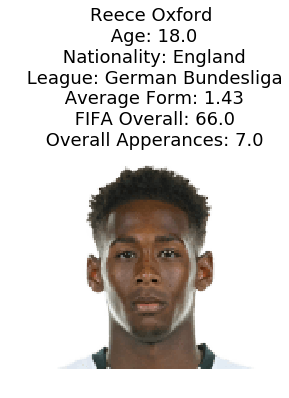

In [18]:
Abroad_ENG = Abroad_ENG.reset_index().drop('index',1)
Abroad_ENG['Average Form'] = Abroad_ENG['Average Form'].round(2) 
Abroad_ENG[['Average Form','overall','Overall Apps','age']] = Abroad_ENG[['Average Form','overall','Overall Apps','age']].astype(str)
Abroad_ENG['photo'] = Abroad_ENG['photo'].replace('/18/','/1x/18/', regex=True)
Abroad_ENG_Matrix = Abroad_ENG['photo'].as_matrix()
Oxford = mpimg.imread(Abroad_ENG_Matrix[0])

mpl.rcParams['font.size'] = 15
f, ax = plt.subplots(1,figsize=(4,4))
fig = plt.figure()
ax.set_facecolor('lightcoral') 
ax.imshow(Oxford)
ax.set_title(Abroad_ENG['Players'].loc[0] + '\n' + ' Age: ' + Abroad_ENG['age'].loc[0] + '\n' + ' Nationality: ' + Abroad_ENG['nationality'].loc[0] + '\n' + ' League: ' + Abroad_ENG['league'].loc[0] + '\n' +  ' Average Form: ' + Abroad_ENG['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Abroad_ENG['overall'].loc[0] + '\n' + ' Overall Apperances: ' + Abroad_ENG['Overall Apps'].loc[0])
ax.axis('off')

# How do Homegrown/Foreign players perform in each individual position?
## Are these findings reflected in FIFA's overall ratings?

### Breakdown of Positions

#### English Premier League Position Breakdown
* Find the **average form** for **each position** for both Homegrown and Foreign and place them in a dataframe.
* Find the **average overall** for **each position** for both Homegrown and Foreign and place them in a dataframe.

In [19]:
EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Average Form'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Average Form'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','Average Form'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','Average Form'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','Average Form'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','Average Form'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Average Form'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Average Form'].mean()

EPL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_positions.set_value(0,'Position',"Goalkeeper")
EPL_positions.set_value(0,'Homegrown',EPL_H_GK)
EPL_positions.set_value(0,'Foreign',EPL_F_GK)
EPL_positions.set_value(1,'Position',"Defender")
EPL_positions.set_value(1,'Homegrown',EPL_H_DEF)
EPL_positions.set_value(1,'Foreign',EPL_F_DEF)
EPL_positions.set_value(2,'Position',"Midfielder")
EPL_positions.set_value(2,'Homegrown',EPL_H_MID)
EPL_positions.set_value(2,'Foreign',EPL_F_MID)
EPL_positions.set_value(3,'Position',"Forward")
EPL_positions.set_value(3,'Homegrown',EPL_H_FWD)
EPL_positions.set_value(3,'Foreign',EPL_F_FWD)

EPL_positions =EPL_positions.transpose()
EPL_positions.columns =EPL_positions.iloc[0]
EPL_positions =EPL_positions.drop(EPL_positions.index[0])
EPL_positions =EPL_positions.transpose()


EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','overall'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','overall'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','overall'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','overall'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','overall'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','overall'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','overall'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','overall'].mean()

EPL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_overall.set_value(0,'Position',"Goalkeeper")
EPL_overall.set_value(0,'Homegrown',EPL_H_GK)
EPL_overall.set_value(0,'Foreign',EPL_F_GK)
EPL_overall.set_value(1,'Position',"Defender")
EPL_overall.set_value(1,'Homegrown',EPL_H_DEF)
EPL_overall.set_value(1,'Foreign',EPL_F_DEF)
EPL_overall.set_value(2,'Position',"Midfielder")
EPL_overall.set_value(2,'Homegrown',EPL_H_MID)
EPL_overall.set_value(2,'Foreign',EPL_F_MID)
EPL_overall.set_value(3,'Position',"Forward")
EPL_overall.set_value(3,'Homegrown',EPL_H_FWD)
EPL_overall.set_value(3,'Foreign',EPL_F_FWD)

EPL_overall =EPL_overall.transpose()
EPL_overall.columns =EPL_overall.iloc[0]
EPL_overall =EPL_overall.drop(EPL_overall.index[0])
EPL_overall =EPL_overall.transpose()

In [20]:
display_side_by_side(EPL_positions,EPL_overall)

,Homegrown,Foreign
Position,,
Goalkeeper,2.41836,2.50348
Defender,2.24057,2.40161
Midfielder,2.11424,2.38824
Forward,2.90056,3.12641
,Homegrown,Foreign
Position,,
Goalkeeper,75.4545,77
Defender,74.2264,76.9773
Midfielder,74.2931,78.4952


#### Spanish La Liga Position Breakdown
* Find the **average form** for **each position** for both Homegrown and Foreign and place them in a dataframe.
* Find the **average overall** for **each position** for both Homegrown and Foreign and place them in a dataframe.

In [21]:
LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Average Form'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Average Form'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','Average Form'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','Average Form'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','Average Form'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','Average Form'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Average Form'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Average Form'].mean()

LAL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_positions.set_value(0,'Position',"Goalkeeper")
LAL_positions.set_value(0,'Homegrown',LAL_H_GK)
LAL_positions.set_value(0,'Foreign',LAL_F_GK)
LAL_positions.set_value(1,'Position',"Defender")
LAL_positions.set_value(1,'Homegrown',LAL_H_DEF)
LAL_positions.set_value(1,'Foreign',LAL_F_DEF)
LAL_positions.set_value(2,'Position',"Midfielder")
LAL_positions.set_value(2,'Homegrown',LAL_H_MID)
LAL_positions.set_value(2,'Foreign',LAL_F_MID)
LAL_positions.set_value(3,'Position',"Forward")
LAL_positions.set_value(3,'Homegrown',LAL_H_FWD)
LAL_positions.set_value(3,'Foreign',LAL_F_FWD)

LAL_positions =LAL_positions.transpose()
LAL_positions.columns =LAL_positions.iloc[0]
LAL_positions =LAL_positions.drop(LAL_positions.index[0])
LAL_positions =LAL_positions.transpose()
LAL_positions



LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','overall'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','overall'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','overall'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','overall'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','overall'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','overall'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','overall'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','overall'].mean()

LAL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_overall.set_value(0,'Position',"Goalkeeper")
LAL_overall.set_value(0,'Homegrown',LAL_H_GK)
LAL_overall.set_value(0,'Foreign',LAL_F_GK)
LAL_overall.set_value(1,'Position',"Defender")
LAL_overall.set_value(1,'Homegrown',LAL_H_DEF)
LAL_overall.set_value(1,'Foreign',LAL_F_DEF)
LAL_overall.set_value(2,'Position',"Midfielder")
LAL_overall.set_value(2,'Homegrown',LAL_H_MID)
LAL_overall.set_value(2,'Foreign',LAL_F_MID)
LAL_overall.set_value(3,'Position',"Forward")
LAL_overall.set_value(3,'Homegrown',LAL_H_FWD)
LAL_overall.set_value(3,'Foreign',LAL_F_FWD)

LAL_overall =LAL_overall.transpose()
LAL_overall.columns =LAL_overall.iloc[0]
LAL_overall =LAL_overall.drop(LAL_overall.index[0])
LAL_overall =LAL_overall.transpose()

In [22]:
display_side_by_side(LAL_positions,LAL_overall)

,Homegrown,Foreign
Position,,
Goalkeeper,2.321,2.61199
Defender,2.01537,2.48592
Midfielder,2.0031,2.24706
Forward,2.38155,3.28146
,Homegrown,Foreign
Position,,
Goalkeeper,75.6842,78.9091
Defender,74.898,77.8542
Midfielder,75.873,77.4355


#### German Bundesliga Position Breakdown
* Find the **average form** for **each position** for both Homegrown and Foreign and place them in a dataframe.
* Find the **average overall** for **each position** for both Homegrown and Foreign and place them in a dataframe.

In [23]:
BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Average Form'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Average Form'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','Average Form'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','Average Form'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','Average Form'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','Average Form'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Average Form'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Average Form'].mean()

BUN_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_positions.set_value(0,'Position',"Goalkeeper")
BUN_positions.set_value(0,'Homegrown',BUN_H_GK)
BUN_positions.set_value(0,'Foreign',BUN_F_GK)
BUN_positions.set_value(1,'Position',"Defender")
BUN_positions.set_value(1,'Homegrown',BUN_H_DEF)
BUN_positions.set_value(1,'Foreign',BUN_F_DEF)
BUN_positions.set_value(2,'Position',"Midfielder")
BUN_positions.set_value(2,'Homegrown',BUN_H_MID)
BUN_positions.set_value(2,'Foreign',BUN_F_MID)
BUN_positions.set_value(3,'Position',"Forward")
BUN_positions.set_value(3,'Homegrown',BUN_H_FWD)
BUN_positions.set_value(3,'Foreign',BUN_F_FWD)


BUN_positions =BUN_positions.transpose()
BUN_positions.columns =BUN_positions.iloc[0]
BUN_positions =BUN_positions.drop(BUN_positions.index[0])
BUN_positions =BUN_positions.transpose()
BUN_positions


BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','overall'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','overall'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','overall'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','overall'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','overall'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','overall'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','overall'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','overall'].mean()

BUN_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_overall.set_value(0,'Position',"Goalkeeper")
BUN_overall.set_value(0,'Homegrown',BUN_H_GK)
BUN_overall.set_value(0,'Foreign',BUN_F_GK)
BUN_overall.set_value(1,'Position',"Defender")
BUN_overall.set_value(1,'Homegrown',BUN_H_DEF)
BUN_overall.set_value(1,'Foreign',BUN_F_DEF)
BUN_overall.set_value(2,'Position',"Midfielder")
BUN_overall.set_value(2,'Homegrown',BUN_H_MID)
BUN_overall.set_value(2,'Foreign',BUN_F_MID)
BUN_overall.set_value(3,'Position',"Forward")
BUN_overall.set_value(3,'Homegrown',BUN_H_FWD)
BUN_overall.set_value(3,'Foreign',BUN_F_FWD)

BUN_overall =BUN_overall.transpose()
BUN_overall.columns =BUN_overall.iloc[0]
BUN_overall =BUN_overall.drop(BUN_overall.index[0])
BUN_overall =BUN_overall.transpose()

In [24]:
display_side_by_side(BUN_positions,BUN_overall)

,Homegrown,Foreign
Position,,
Goalkeeper,2.35675,2.95456
Defender,2.27154,2.18818
Midfielder,2.26638,2.38559
Forward,2.65567,2.73407
,Homegrown,Foreign
Position,,
Goalkeeper,74.2308,78.3
Defender,73.7736,76.1176
Midfielder,74.5,75.8158


#### French Ligue 1 Position Breakdown
* Find the **average form** for **each position** for both Homegrown and Foreign and place them in a dataframe.
* Find the **average overall** for **each position** for both Homegrown and Foreign and place them in a dataframe.

In [25]:
L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Average Form'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Average Form'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','Average Form'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','Average Form'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','Average Form'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','Average Form'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Average Form'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Average Form'].mean()

L1_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_positions.set_value(0,'Position',"Goalkeeper")
L1_positions.set_value(0,'Homegrown',L1_H_GK)
L1_positions.set_value(0,'Foreign',L1_F_GK)
L1_positions.set_value(1,'Position',"Defender")
L1_positions.set_value(1,'Homegrown',L1_H_DEF)
L1_positions.set_value(1,'Foreign',L1_F_DEF)
L1_positions.set_value(2,'Position',"Midfielder")
L1_positions.set_value(2,'Homegrown',L1_H_MID)
L1_positions.set_value(2,'Foreign',L1_F_MID)
L1_positions.set_value(3,'Position',"Forward")
L1_positions.set_value(3,'Homegrown',L1_H_FWD)
L1_positions.set_value(3,'Foreign',L1_F_FWD)

L1_positions =L1_positions.transpose()
L1_positions.columns =L1_positions.iloc[0]
L1_positions =L1_positions.drop(L1_positions.index[0])
L1_positions =L1_positions.transpose()
L1_positions


L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','overall'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','overall'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','overall'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','overall'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','overall'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','overall'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','overall'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','overall'].mean()

L1_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_overall.set_value(0,'Position',"Goalkeeper")
L1_overall.set_value(0,'Homegrown',L1_H_GK)
L1_overall.set_value(0,'Foreign',L1_F_GK)
L1_overall.set_value(1,'Position',"Defender")
L1_overall.set_value(1,'Homegrown',L1_H_DEF)
L1_overall.set_value(1,'Foreign',L1_F_DEF)
L1_overall.set_value(2,'Position',"Midfielder")
L1_overall.set_value(2,'Homegrown',L1_H_MID)
L1_overall.set_value(2,'Foreign',L1_F_MID)
L1_overall.set_value(3,'Position',"Forward")
L1_overall.set_value(3,'Homegrown',L1_H_FWD)
L1_overall.set_value(3,'Foreign',L1_F_FWD)

L1_overall =L1_overall.transpose()
L1_overall.columns =L1_overall.iloc[0]
L1_overall =L1_overall.drop(L1_overall.index[0])
L1_overall =L1_overall.transpose()

In [26]:
display_side_by_side(L1_positions,L1_overall)

,Homegrown,Foreign
Position,,
Goalkeeper,2.37842,2.68963
Defender,2.40664,2.49837
Midfielder,2.13099,2.15624
Forward,2.05171,2.49129
,Homegrown,Foreign
Position,,
Goalkeeper,73.25,74.3571
Defender,71.8444,73.4776
Midfielder,72.6633,73.9322


In [27]:
SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Average Form'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Average Form'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','Average Form'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','Average Form'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','Average Form'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','Average Form'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Average Form'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Average Form'].mean()

SEI_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_positions.set_value(0,'Position',"Goalkeeper")
SEI_positions.set_value(0,'Homegrown',SEI_H_GK)
SEI_positions.set_value(0,'Foreign',SEI_F_GK)
SEI_positions.set_value(1,'Position',"Defender")
SEI_positions.set_value(1,'Homegrown',SEI_H_DEF)
SEI_positions.set_value(1,'Foreign',SEI_F_DEF)
SEI_positions.set_value(2,'Position',"Midfielder")
SEI_positions.set_value(2,'Homegrown',SEI_H_MID)
SEI_positions.set_value(2,'Foreign',SEI_F_MID)
SEI_positions.set_value(3,'Position',"Forward")
SEI_positions.set_value(3,'Homegrown',SEI_H_FWD)
SEI_positions.set_value(3,'Foreign',SEI_F_FWD)

SEI_positions =SEI_positions.transpose()
SEI_positions.columns =SEI_positions.iloc[0]
SEI_positions =SEI_positions.drop(SEI_positions.index[0])
SEI_positions =SEI_positions.transpose()



SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','overall'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','overall'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','overall'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','overall'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','overall'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','overall'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','overall'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','overall'].mean()

SEI_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_overall.set_value(0,'Position',"Goalkeeper")
SEI_overall.set_value(0,'Homegrown',SEI_H_GK)
SEI_overall.set_value(0,'Foreign',SEI_F_GK)
SEI_overall.set_value(1,'Position',"Defender")
SEI_overall.set_value(1,'Homegrown',SEI_H_DEF)
SEI_overall.set_value(1,'Foreign',SEI_F_DEF)
SEI_overall.set_value(2,'Position',"Midfielder")
SEI_overall.set_value(2,'Homegrown',SEI_H_MID)
SEI_overall.set_value(2,'Foreign',SEI_F_MID)
SEI_overall.set_value(3,'Position',"Forward")
SEI_overall.set_value(3,'Homegrown',SEI_H_FWD)
SEI_overall.set_value(3,'Foreign',SEI_F_FWD)

SEI_overall =SEI_overall.transpose()
SEI_overall.columns =SEI_overall.iloc[0]
SEI_overall =SEI_overall.drop(SEI_overall.index[0])
SEI_overall =SEI_overall.transpose()

### How do Homegrown/Foreign players perform in each individual position?

### Findings:
#### General Trends:
* It seems that across the board **Foreign players are on average much better than Homegrown players** in both real life form and FIFA ratings.<br> **Of 40** different comparable **bar charts** in **only 1** case **Homegrown players are better** which is shocking.
* In general it can be seen forwards have a much better form than any other position so this can make other positions ratings in FIFA inaccurate. But it is **our believe** that **FIFA normalise ratings for each position**.
#### English Premier League<br>
* The general trend of Foreign players being better can be seen in these graphs.
* **FIFA's ratings for each position seem very accurate here**, the height between Homegrown and Foreignplayers looks very similar.
#### Spanish La Liga<br>
* The general trend of Foreign players being better can be seen in these graphs.
* **FIFA's ratings for each position seem inaccurate**. In every position Foreign players perform much better than their Homegrown counterparts. This is not represented in FIFA.
* When looking at Forwards there seems to be a huge difference in Foreign and Homegrown.<br>This we believe is due to two players **Cristiano Ronaldo** and **Lionel Messi** who are said to be the best forwards in the world.
#### Italian Serie A<br>
* The general trend of Foreign players being better can be seen in these graphs.
* A **similar but less significant trend** can be seen in FIFA's ratings for each position seem very accurate here **like the Spanish La Liga**.
#### French Ligue 1<br>
* The general trend of Foreign players being better can be seen in these graphs.
* **Homegrown Goalkeepers** seem to be **very overrated** in this league.
#### German Bundesliga<br>
* In this league lies the **one case where Homegrown players perform better than Foreign**, this occurs in the position of Defenders.
* **But** this is **not reflected in FIFA's ratings** which makes little sense.**FIFA** seem to **overrate Homegrown players** in general **but why not in this case?**.

#### Code:
* Each side by side pair of graphs comparing Form to Overall is divided into leagues.
* Made sure when using x and y limits they were fixed so graphs between leagues were comparable.
* Save each figure to data for later use.

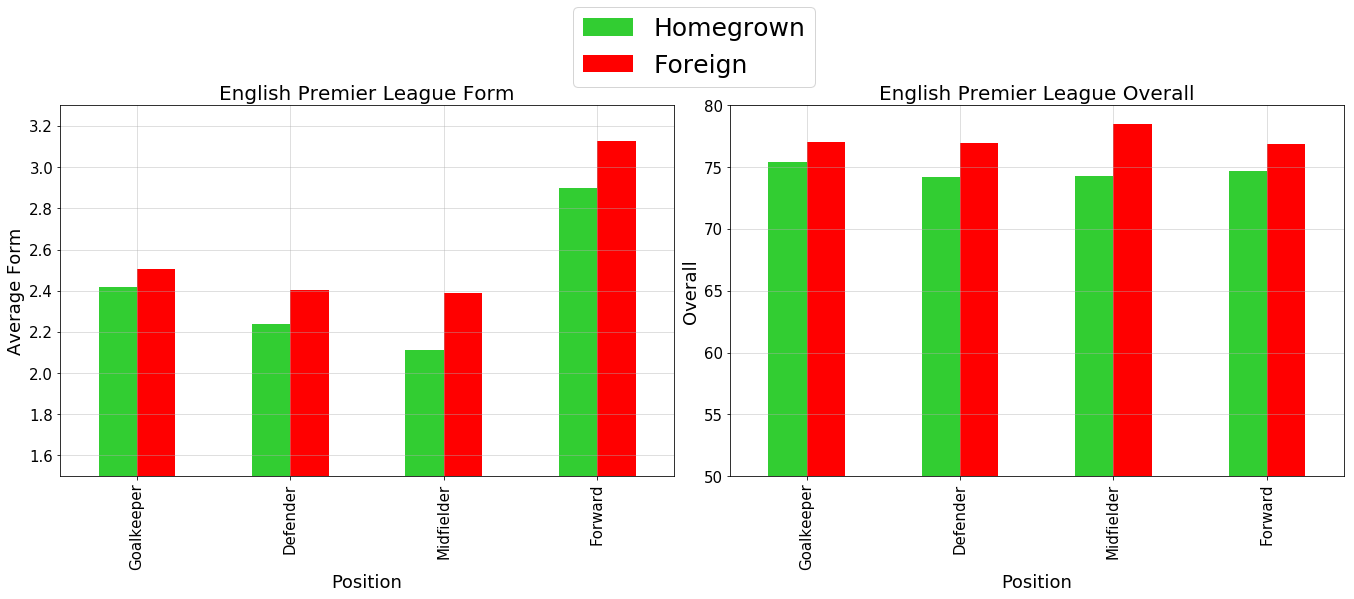

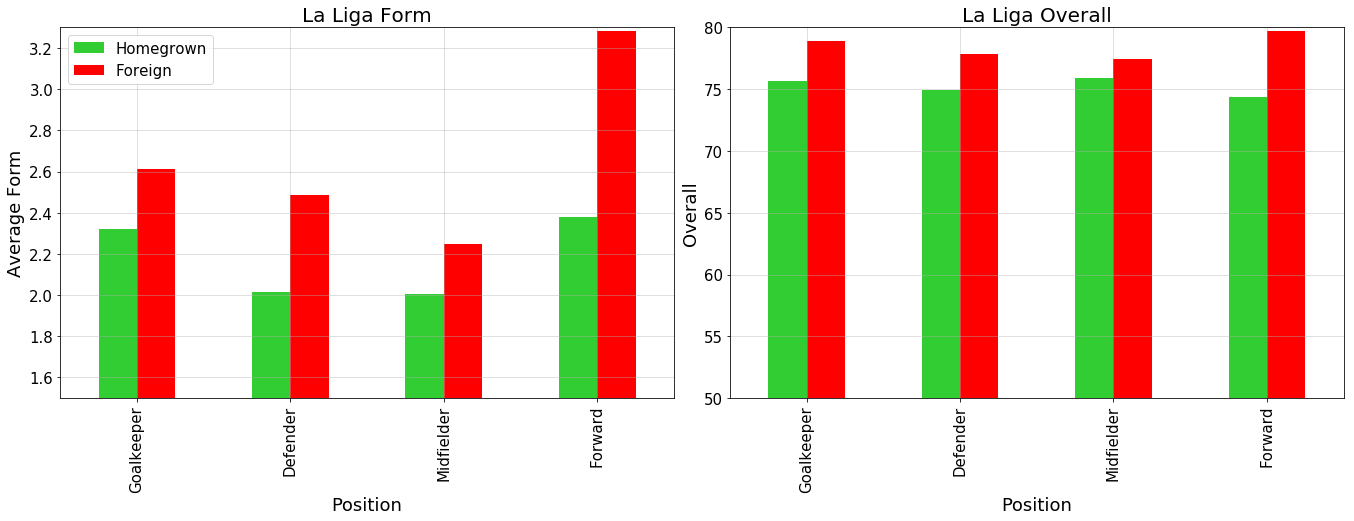

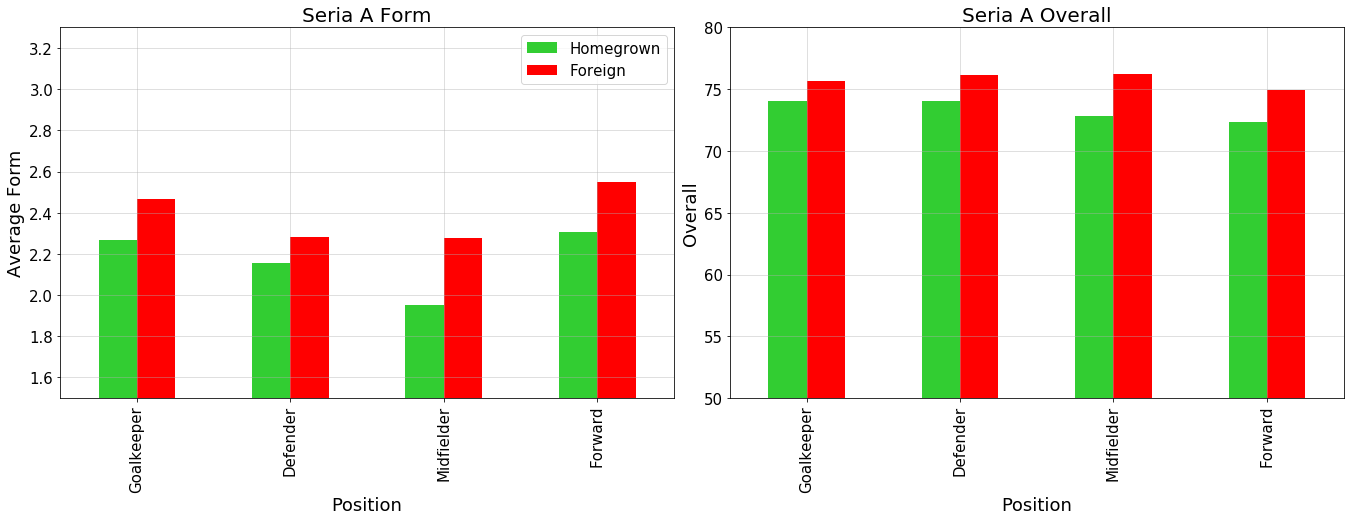

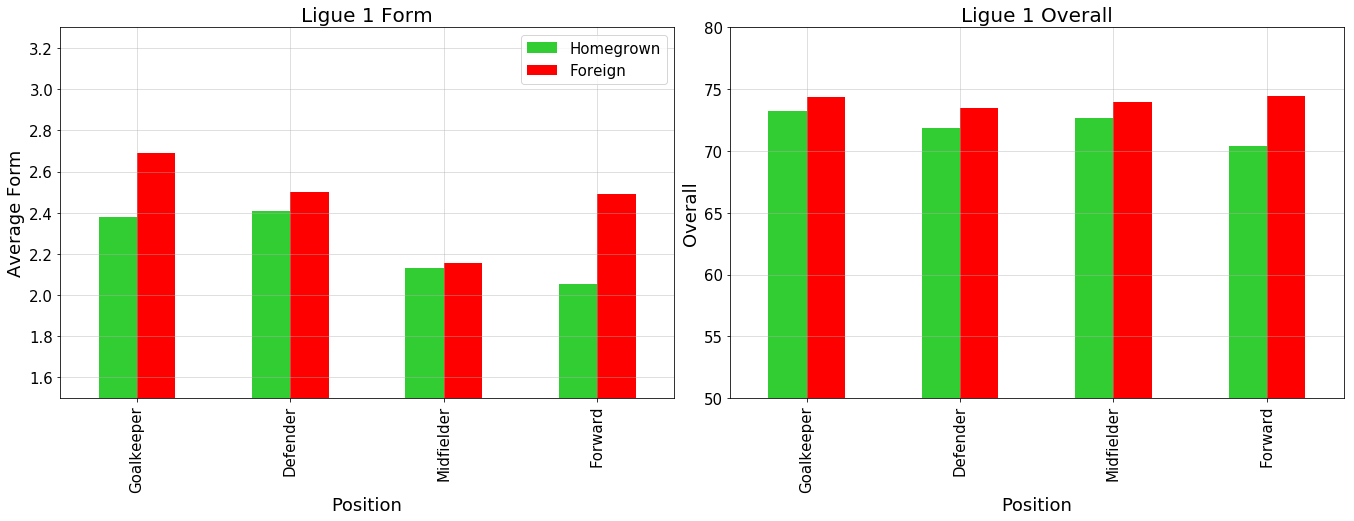

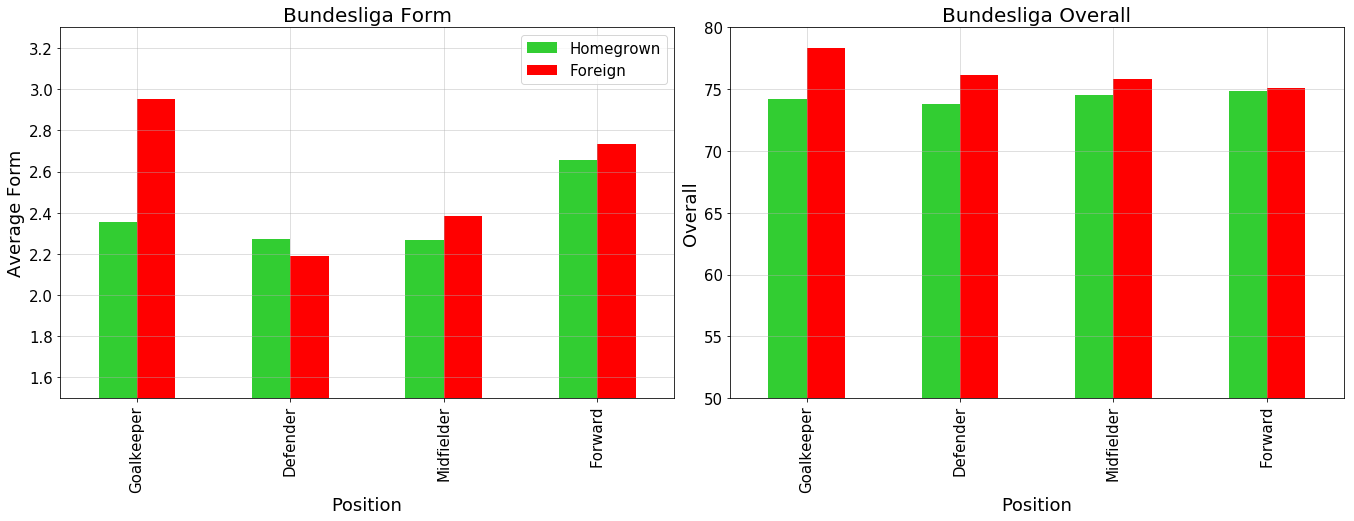

In [28]:
axis_size=18
color = ['limegreen','r']

fig = plt.figure(figsize=(35,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('English Premier League Form',size=20)
EPL_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax0.legend(bbox_to_anchor=(1.25, 1.3, 0, 0),prop={'size':25})
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,80])
ax1.set_title('English Premier League Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
EPL_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F1.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('La Liga Form',size=20)
LAL_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,80])
ax1.set_title('La Liga Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
LAL_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F2.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Seria A Form',size=20)
SEI_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_title('Seria A Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
ax1.set_ylim([50,80])
SEI_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F3.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Ligue 1 Form',size=20)
L1_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,80])
ax1.set_title('Ligue 1 Overall',size=20)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
L1_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
fig.savefig('../../data/analysis/League H_F5.png')


fig = plt.figure(figsize=(35,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.3])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Bundesliga Form',size=20)
BUN_positions.plot(ax=ax0,kind='bar',color=color,grid=True)
ax0.grid(alpha=0.5)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_title('Bundesliga Overall',size=20)
ax1.set_ylim([50,80])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
BUN_overall.plot(ax=ax1,kind='bar',color=color,grid=True)
ax1.grid(alpha=0.5)
ax1.legend_.remove()
plt.show()
fig.savefig('../../data/analysis/League H_F6.png')

## Whos more likely to Start?
### Findings
* Foreign players are much more likley to start.
* Only in the Bundesliga is tehe divide even.
* The most serious case can be seen in the EPL.
<br>This could possibly be attributed to youth players playing in their Home Leagues and not being experienced enough to start.
#### Code:
* Finding the **Mean Starts and Appearances** for Homegrown and Foreign players in every league and putting them into a dataframe.

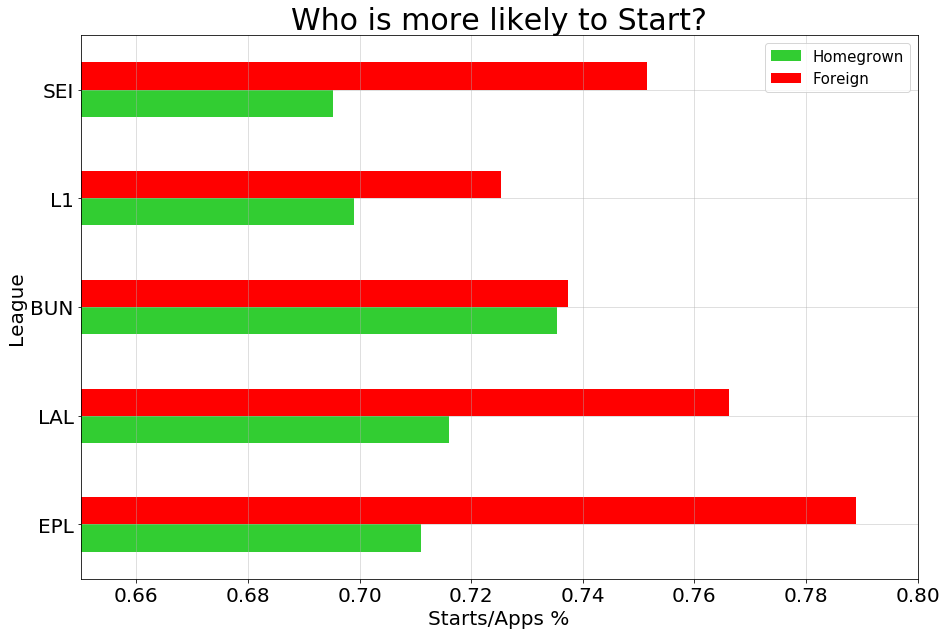

,League,Homegrown,Foreign
0,EPL,0.711031,0.788975
1,LAL,0.715971,0.766175
2,BUN,0.735374,0.737333
3,L1,0.699078,0.725429
4,SEI,0.695266,0.751528


In [29]:
EPLH_starts = Homegrown_EPL['Starts/Apps'].mean()
EPLF_starts = Foreign_EPL['Starts/Apps'].mean()

LALH_starts = Homegrown_LAL['Starts/Apps'].mean()
LALF_starts = Foreign_LAL['Starts/Apps'].mean()

BUNH_starts = Homegrown_BUN['Starts/Apps'].mean()
BUNF_starts = Foreign_BUN['Starts/Apps'].mean()

L1H_starts = Homegrown_L1['Starts/Apps'].mean()
L1F_starts = Foreign_L1['Starts/Apps'].mean()

SEIH_starts = Homegrown_SEI['Starts/Apps'].mean()
SEIF_starts = Foreign_SEI['Starts/Apps'].mean()

starts = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
starts.set_value(0,'League',"EPL")
starts.set_value(0,'Homegrown',EPLH_starts)
starts.set_value(0,'Foreign',EPLF_starts)
starts.set_value(1,'League',"LAL")
starts.set_value(1,'Homegrown',LALH_starts )
starts.set_value(1,'Foreign',LALF_starts)
starts.set_value(2,'League',"BUN")
starts.set_value(2,'Homegrown',BUNH_starts)
starts.set_value(2,'Foreign',BUNF_starts)
starts.set_value(3,'League',"L1")
starts.set_value(3,'Homegrown',L1H_starts)
starts.set_value(3,'Foreign',L1F_starts)
starts.set_value(4,'League',"SEI")
starts.set_value(4,'Homegrown',SEIH_starts)
starts.set_value(4,'Foreign',SEIF_starts)

ax = starts[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Starts/Apps %", fontsize=20)
ax.set_title("Who is more likely to Start?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.65,0.8)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to Start?.png')

starts

## Who's more likely to be Subbed Off? 
### Findings
* Foreign players are more likley to start being the highest in 4 of the leagues.
* Homegrown players are the mosted subbed off in the French League.
* The most biggest difference can be seen in the Italian Serie A where Foreign players are **4%** morelikley to be subbed off.
#### Code:
* Finding the **Mean Subbed Off/Appearances** for Homegrown and Foreign players in every league and putting them into a dataframe.

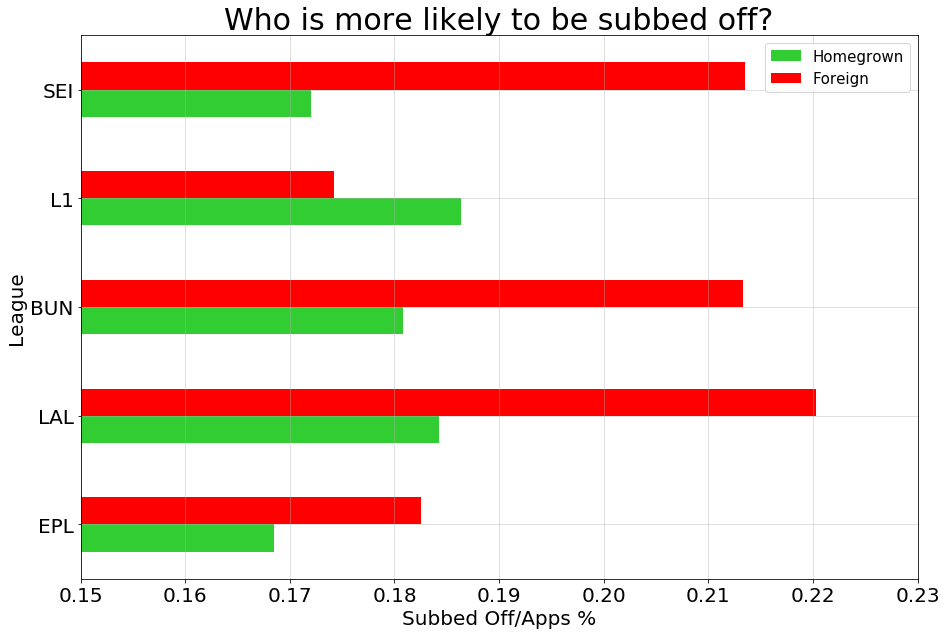

,League,Homegrown,Foreign
0,EPL,0.1685,0.182508
1,LAL,0.184304,0.22032
2,BUN,0.180851,0.213323
3,L1,0.186398,0.174236
4,SEI,0.172065,0.213468


In [30]:
EPLH_subbed = Homegrown_EPL['Subbed Off/Apps'].mean()
EPLF_subbed = Foreign_EPL['Subbed Off/Apps'].mean()
EPL_subbed = pd.DataFrame([EPLH_subbed,EPLF_subbed])

LALH_subbed = Homegrown_LAL['Subbed Off/Apps'].mean()
LALF_subbed = Foreign_LAL['Subbed Off/Apps'].mean()
LAL_subbed = pd.DataFrame([LALH_subbed,LALF_subbed])

BUNH_subbed = Homegrown_BUN['Subbed Off/Apps'].mean()
BUNF_subbed = Foreign_BUN['Subbed Off/Apps'].mean()
BUN_subbed = pd.DataFrame([BUNH_subbed,BUNF_subbed])

L1H_subbed = Homegrown_L1['Subbed Off/Apps'].mean()
L1F_subbed = Foreign_L1['Subbed Off/Apps'].mean()
L1_subbed = pd.DataFrame([L1H_subbed,L1F_subbed])

SEIH_subbed = Homegrown_SEI['Subbed Off/Apps'].mean()
SEIF_subbed = Foreign_SEI['Subbed Off/Apps'].mean()
SEI_subbed = pd.DataFrame([SEIH_subbed,SEIF_subbed])

subbed = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
subbed.set_value(0,'League',"EPL")
subbed.set_value(0,'Homegrown',EPLH_subbed)
subbed.set_value(0,'Foreign',EPLF_subbed)
subbed.set_value(1,'League',"LAL")
subbed.set_value(1,'Homegrown',LALH_subbed )
subbed.set_value(1,'Foreign',LALF_subbed)
subbed.set_value(2,'League',"BUN")
subbed.set_value(2,'Homegrown',BUNH_subbed)
subbed.set_value(2,'Foreign',BUNF_subbed)
subbed.set_value(3,'League',"L1")
subbed.set_value(3,'Homegrown',L1H_subbed)
subbed.set_value(3,'Foreign',L1F_subbed)
subbed.set_value(4,'League',"SEI")
subbed.set_value(4,'Homegrown',SEIH_subbed)
subbed.set_value(4,'Foreign',SEIF_subbed)

ax = subbed[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Subbed Off/Apps %", fontsize=20)
ax.set_title("Who is more likely to be subbed off?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.15,0.23)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to be subbed off?.png')

subbed

## Whos more likely to Score a Goal?
### Findings
* Foreign players are more likley to score in all of the leagues.
* In the Spanish La Liga a **Foreign Player** is **10% more** likley to score than a Homegrown player
#### Code:
* Finding the **Mean Goals/Apps** for Homegrown and Foreign players in every league and putting them into a dataframe.
* Only using forwards.

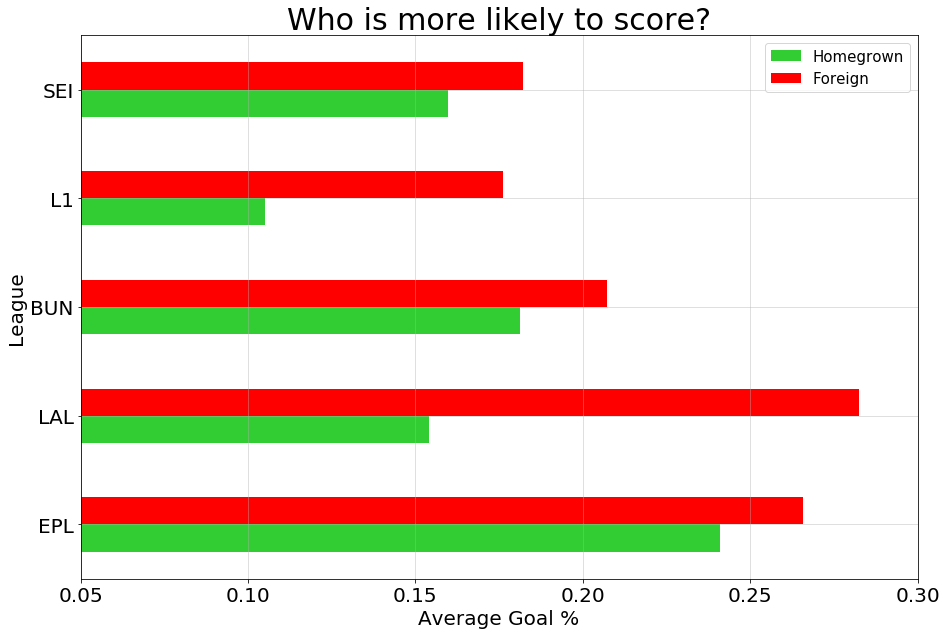

,League,Homegrown,Foreign
0,EPL,0.240909,0.265736
1,LAL,0.154038,0.282512
2,BUN,0.181261,0.207093
3,L1,0.105024,0.176152
4,SEI,0.159793,0.18205


In [31]:
EPLH_goals = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Goals/Apps'].mean()
EPLF_goals = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Goals/Apps'].mean()

BUNH_goals = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Goals/Apps'].mean()
BUNF_goals = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Goals/Apps'].mean()

LALH_goals = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Goals/Apps'].mean()
LALF_goals = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Goals/Apps'].mean()

L1H_goals = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Goals/Apps'].mean()
L1F_goals = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Goals/Apps'].mean()

SEIH_goals = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Goals/Apps'].mean()
SEIF_goals = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Goals/Apps'].mean()

goals = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
goals.set_value(0,'League',"EPL")
goals.set_value(0,'Homegrown',EPLH_goals)
goals.set_value(0,'Foreign',EPLF_goals)
goals.set_value(1,'League',"LAL")
goals.set_value(1,'Homegrown',LALH_goals )
goals.set_value(1,'Foreign',LALF_goals)
goals.set_value(2,'League',"BUN")
goals.set_value(2,'Homegrown',BUNH_goals)
goals.set_value(2,'Foreign',BUNF_goals)
goals.set_value(3,'League',"L1")
goals.set_value(3,'Homegrown',L1H_goals)
goals.set_value(3,'Foreign',L1F_goals)
goals.set_value(4,'League',"SEI")
goals.set_value(4,'Homegrown',SEIH_goals)
goals.set_value(4,'Foreign',SEIF_goals)

ax = goals[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Average Goal %", fontsize=20)
ax.set_title("Who is more likely to score?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.05,0.3)
plt.show()
plt.savefig('../../data/analysis/Who is more likely to score?.png')

goals

## Whos more likely to assist goals?
### Findings
* Foreign players assist more on average accept in the Bundesliga which is very even.
* In the Italian Serie A a **Foreign Player** is **3% more** likley to assist than a Homegrown player
#### Code:
* Finding the **Mean Starts and Appearances** for Homegrown and Foreign players in every league and putting them into a dataframe.
* Only using Midfielders.

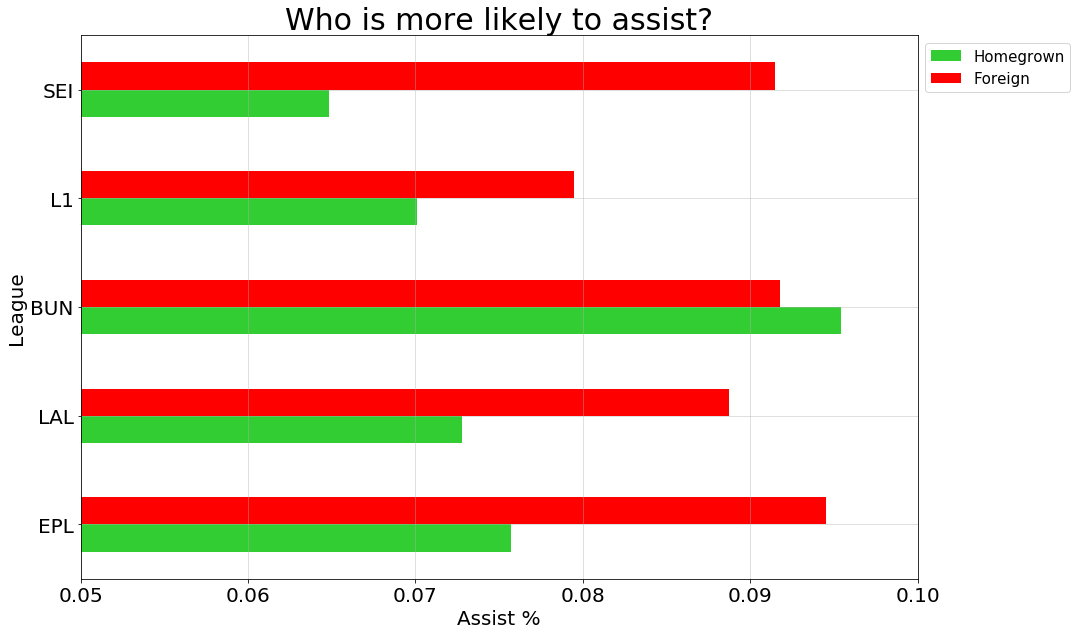

,League,Homegrown,Foreign
0,EPL,0.0757235,0.0945436
1,LAL,0.072769,0.088729
2,BUN,0.0954345,0.0917738
3,L1,0.0701031,0.0794721
4,SEI,0.0648131,0.091497


In [32]:
EPLH_assists = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','Assists/Apps'].mean()
EPLF_assists = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','Assists/Apps'].mean()
EPL_assists = pd.DataFrame([EPLH_assists,EPLF_assists])

LALH_assists = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','Assists/Apps'].mean()
LALF_assists = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','Assists/Apps'].mean()
LAL_assists = pd.DataFrame([LALH_assists,LALF_assists])

BUNH_assists = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','Assists/Apps'].mean()
BUNF_assists = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','Assists/Apps'].mean()
BUN_assists = pd.DataFrame([BUNH_assists,BUNF_assists])

L1H_assists = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','Assists/Apps'].mean()
L1F_assists = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','Assists/Apps'].mean()
L1_assists = pd.DataFrame([L1H_assists,L1F_assists])

SEIH_assists = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','Assists/Apps'].mean()
SEIF_assists = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','Assists/Apps'].mean()
SEI_assists = pd.DataFrame([SEIH_assists,SEIF_assists])

assists = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
assists.set_value(0,'League',"EPL")
assists.set_value(0,'Homegrown',EPLH_assists)
assists.set_value(0,'Foreign',EPLF_assists)
assists.set_value(1,'League',"LAL")
assists.set_value(1,'Homegrown',LALH_assists )
assists.set_value(1,'Foreign',LALF_assists)
assists.set_value(2,'League',"BUN")
assists.set_value(2,'Homegrown',BUNH_assists)
assists.set_value(2,'Foreign',BUNF_assists)
assists.set_value(3,'League',"L1")
assists.set_value(3,'Homegrown',L1H_assists)
assists.set_value(3,'Foreign',L1F_assists)
assists.set_value(4,'League',"SEI")
assists.set_value(4,'Homegrown',SEIH_assists)
assists.set_value(4,'Foreign',SEIF_assists)

ax = assists[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Assist %", fontsize=20)
ax.set_title("Who is more likely to assist?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.05,0.1)
plt.show()

assists

## Who is more likely to keep a Cleansheet
### Findings
* A Homegrown Goalkeeper in the French Ligue 1 is **4%** more likley to keep a cleansheet than a Foreign Goalkeeper.
* A Foreign Goalkeeper is **10%** more likely to keep a cleansheet than a Homegrown Goalkeeper.
#### Code:
* Finding the **Mean Clean Sheets/Apps** for Homegrown and Foreign players in every league and putting them into a dataframe.
* Only using Goalkeepers.

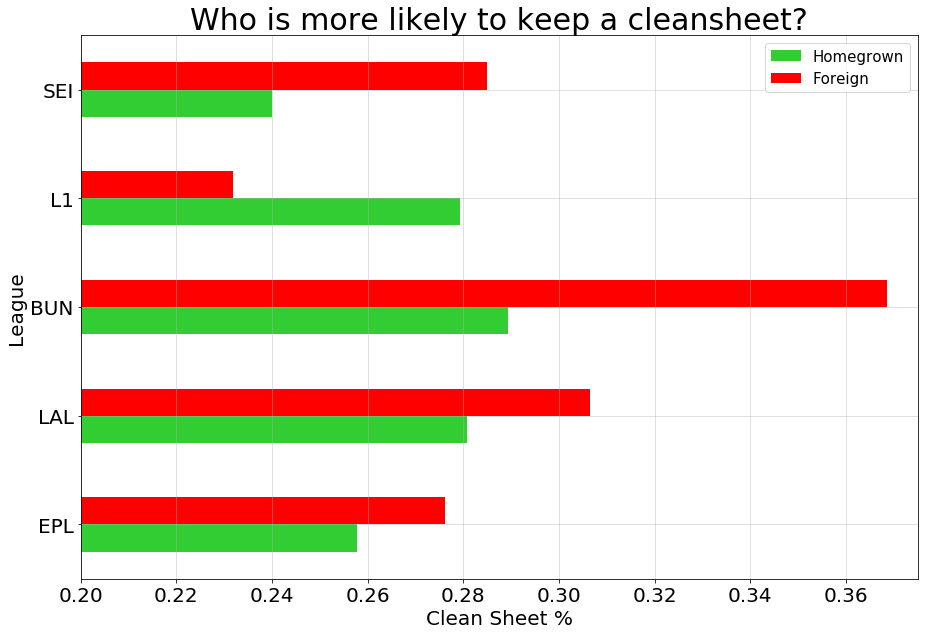

,League,Homegrown,Foreign
0,EPL,0.257793,0.276225
1,LAL,0.280871,0.306518
2,BUN,0.28933,0.368711
3,L1,0.279229,0.231765
4,SEI,0.239935,0.284952


In [33]:
EPLH_gkcleansheets = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPLF_gkcleansheets = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPL_gkcleansheets = pd.DataFrame([EPLH_gkcleansheets,EPLF_gkcleansheets])

BUNH_gkcleansheets = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUNF_gkcleansheets = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUN_gkcleansheets = pd.DataFrame([BUNH_gkcleansheets,BUNF_gkcleansheets])

LALH_gkcleansheets = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LALF_gkcleansheets = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LAL_gkcleansheets = pd.DataFrame([LALH_gkcleansheets,LALF_gkcleansheets])

L1H_gkcleansheets = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1F_gkcleansheets = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1_gkcleansheets = pd.DataFrame([L1H_gkcleansheets,L1F_gkcleansheets])

SEIH_gkcleansheets = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEIF_gkcleansheets = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEI_gkcleansheets = pd.DataFrame([SEIH_gkcleansheets,SEIF_gkcleansheets])

gkcleansheets = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
gkcleansheets.set_value(0,'League',"EPL")
gkcleansheets.set_value(0,'Homegrown',EPLH_gkcleansheets)
gkcleansheets.set_value(0,'Foreign',EPLF_gkcleansheets)
gkcleansheets.set_value(1,'League',"LAL")
gkcleansheets.set_value(1,'Homegrown',LALH_gkcleansheets )
gkcleansheets.set_value(1,'Foreign',LALF_gkcleansheets)
gkcleansheets.set_value(2,'League',"BUN")
gkcleansheets.set_value(2,'Homegrown',BUNH_gkcleansheets)
gkcleansheets.set_value(2,'Foreign',BUNF_gkcleansheets)
gkcleansheets.set_value(3,'League',"L1")
gkcleansheets.set_value(3,'Homegrown',L1H_gkcleansheets)
gkcleansheets.set_value(3,'Foreign',L1F_gkcleansheets)
gkcleansheets.set_value(4,'League',"SEI")
gkcleansheets.set_value(4,'Homegrown',SEIH_gkcleansheets)
gkcleansheets.set_value(4,'Foreign',SEIF_gkcleansheets)

ax = gkcleansheets[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("League", fontsize=20)
ax.set_xlabel("Clean Sheet %", fontsize=20)
ax.set_title("Who is more likely to keep a cleansheet?",fontsize= 30)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
ax.set_xlim(0.2,0.375)
plt.show()

gkcleansheets

# <br><br>Who Performs Better vs Who is Rated Better?
### Findings
* The same general trend can be seen once again that **Foreign players perform better than Homegrown players**.
* When looking at the length difference in the bar charts between Homegrown and Foreign players all but the **La Liga** seem fairly represented where it can be seen that Foreign players are rated about **3 ratings higher** than they should.
* **French league** players also seem to be rated around **2 ratings less** than their form reflects.
#### Code:
* Finding the **Mean Average Form** for Homegrown and Foreign players in every league and putting them into seperate dataframes.
* Next Finding **Mean Overall** for Homegrown and Foreign players in every league and putting them into seperate dataframes.

In [34]:
EPLH_form = Homegrown_EPL['Average Form'].mean()
EPLF_form = Foreign_EPL['Average Form'].mean()
EPL_form = pd.DataFrame([EPLH_form,EPLF_form])

LALH_form = Homegrown_LAL['Average Form'].mean()
LALF_form = Foreign_LAL['Average Form'].mean()
LAL_form = pd.DataFrame([LALH_form,LALF_form])

BUNH_form = Homegrown_BUN['Average Form'].mean()
BUNF_form = Foreign_BUN['Average Form'].mean()
BUN_form = pd.DataFrame([BUNH_form,BUNF_form])

L1H_form = Homegrown_L1['Average Form'].mean()
L1F_form = Foreign_L1['Average Form'].mean()
L1_form = pd.DataFrame([L1H_form,L1F_form])

SEIH_form = Homegrown_SEI['Average Form'].mean()
SEIF_form = Foreign_SEI['Average Form'].mean()
SEI_form = pd.DataFrame([SEIH_form,SEIF_form])


form = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
form.set_value(0,'League',"EPL")
form.set_value(0,'Homegrown',EPLH_form)
form.set_value(0,'Foreign',EPLF_form)
form.set_value(1,'League',"LAL")
form.set_value(1,'Homegrown',LALH_form )
form.set_value(1,'Foreign',LALF_form)
form.set_value(2,'League',"BUN")
form.set_value(2,'Homegrown',BUNH_form)
form.set_value(2,'Foreign',BUNF_form)
form.set_value(3,'League',"L1")
form.set_value(3,'Homegrown',L1H_form)
form.set_value(3,'Foreign',L1F_form)
form.set_value(4,'League',"SEI")
form.set_value(4,'Homegrown',SEIH_form)
form.set_value(4,'Foreign',SEIF_form)

EPLH_overall = Homegrown_EPL['overall'].mean()
EPLA_overall = Foreign_EPL['overall'].mean()
EPL_overall = pd.DataFrame([EPLH_overall,EPLA_overall])

LALH_overall = Homegrown_LAL['overall'].mean()
LALF_overall = Foreign_LAL['overall'].mean()
LAL_overall = pd.DataFrame([LALH_overall,LALF_overall])

BUNH_overall = Homegrown_BUN['overall'].mean()
BUNF_overall = Foreign_BUN['overall'].mean()
BUN_overall = pd.DataFrame([BUNH_overall,BUNF_overall])

L1H_overall = Homegrown_L1['overall'].mean()
L1F_overall = Foreign_L1['overall'].mean()
L1_overall = pd.DataFrame([L1H_overall,L1F_overall])

SEIH_overall = Homegrown_SEI['overall'].mean()
SEIF_overall = Foreign_SEI['overall'].mean()
SEI_overall = pd.DataFrame([SEIH_overall,SEIF_overall])

overall = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
overall.set_value(0,'League',"EPL")
overall.set_value(0,'Homegrown',EPLH_overall)
overall.set_value(0,'Foreign',EPLA_overall)
overall.set_value(1,'League',"LAL")
overall.set_value(1,'Homegrown',LALH_overall )
overall.set_value(1,'Foreign',LALF_overall)
overall.set_value(2,'League',"BUN")
overall.set_value(2,'Homegrown',BUNH_overall)
overall.set_value(2,'Foreign',BUNF_overall)
overall.set_value(3,'League',"L1")
overall.set_value(3,'Homegrown',L1H_overall)
overall.set_value(3,'Foreign',L1F_overall)
overall.set_value(4,'League',"SEI")
overall.set_value(4,'Homegrown',SEIH_overall)
overall.set_value(4,'Foreign',SEIF_overall)

display_side_by_side(form,overall)

,League,Homegrown,Foreign
0,EPL,2.32796,2.55078
1,LAL,2.12445,2.58726
2,BUN,2.33793,2.44611
3,L1,2.20652,2.39744
4,SEI,2.13404,2.33633
,League,Homegrown,Foreign
0,EPL,74.4333,77.5269
1,LAL,75.2395,78.1899
2,BUN,74.3069,75.8674
3,L1,72.1373,73.892


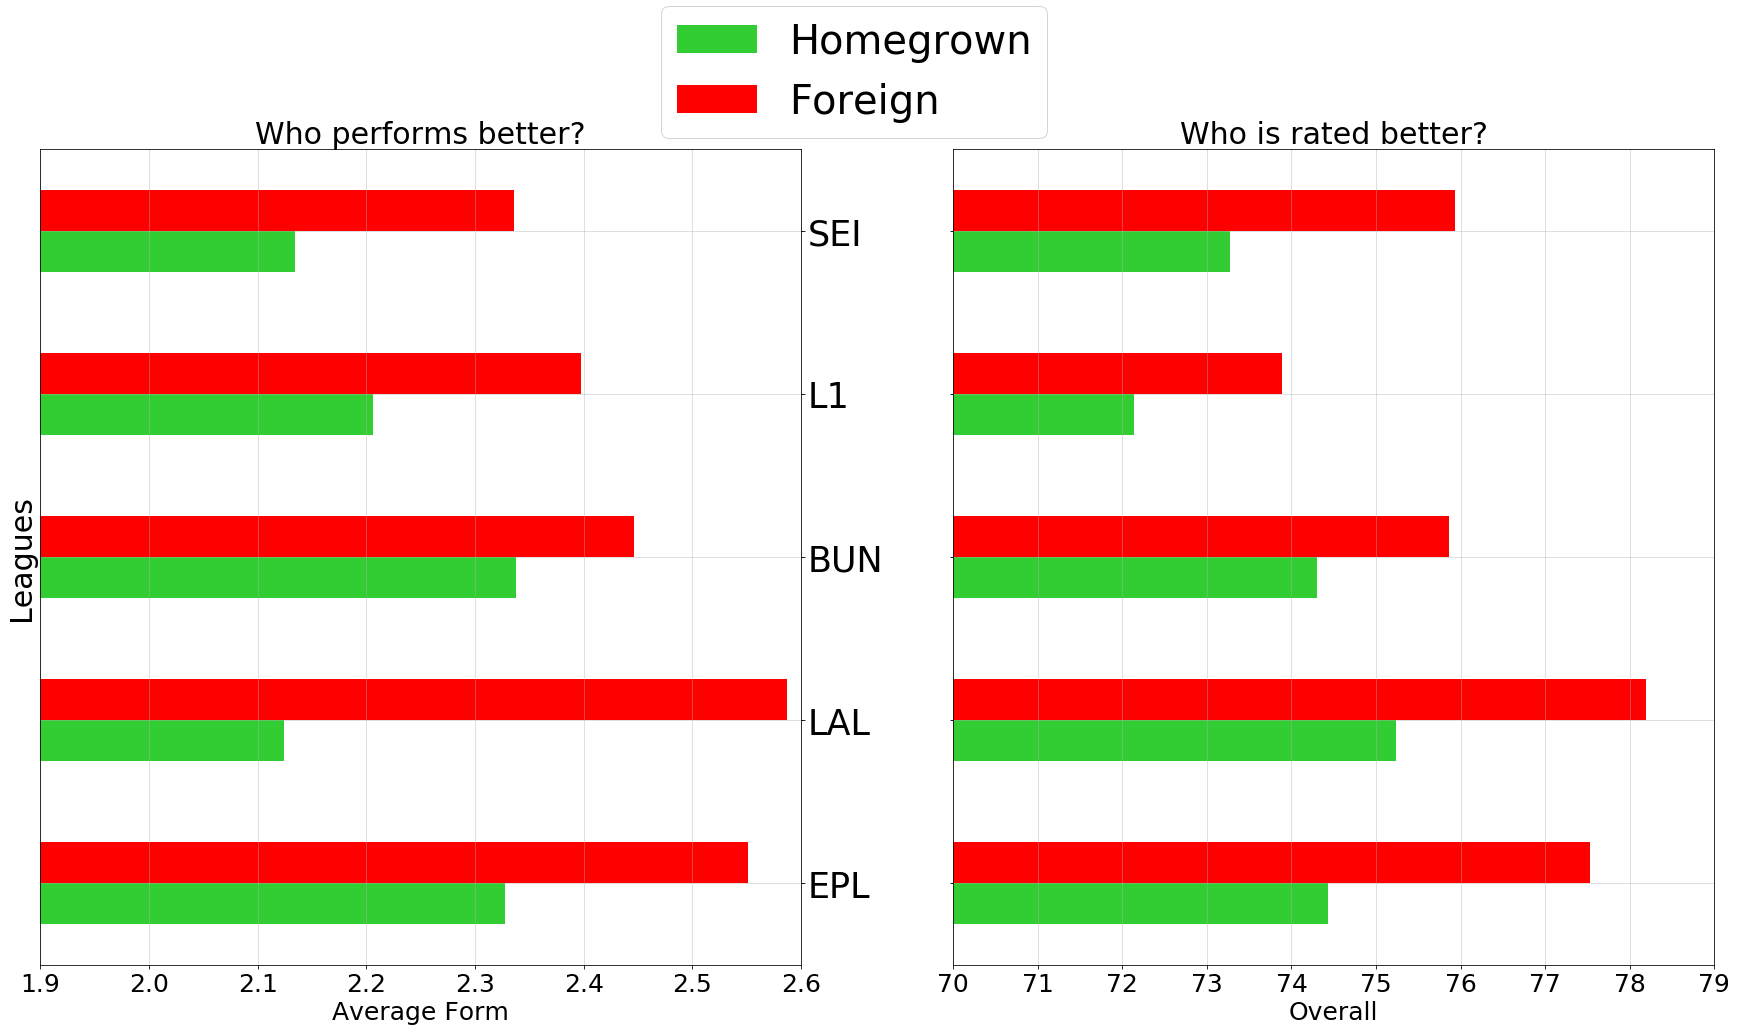

In [35]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(30,15))
ax.yaxis.tick_right()

ax = form[['Homegrown','Foreign']].plot(ax=ax,kind='barh',color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_ylabel("Leagues", fontsize=30)
ax.set_xlabel("Average Form", fontsize=25)
ax.set_title("Who performs better?",fontsize= 30)
ax.set_xlim(1.9,2.6)
ax.legend(bbox_to_anchor=(1.35, 1.2, 0, 0),prop={'size':40})
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])

ax2 = overall[['Homegrown','Foreign']].plot(ax=ax2,kind='barh',color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax2.grid(alpha=0.5)
ax2.set_ylabel("League", fontsize=25)
ax2.set_title("Who is rated better?",fontsize= 30)
ax2.set_xlabel("Overall", fontsize=25)
ax2.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
ax2.set_xlim(70,79)
ax2.legend_.remove()


plt.setp(ax.get_xticklabels(), fontsize=25)
plt.setp(ax2.get_xticklabels(), fontsize=25)
plt.setp(ax.get_yticklabels(), fontsize=35)
plt.show()

# <br><br>Who Performs Better vs Who is Rated Better? (Home/Abroad)
### Findings
* The same general trend can be seen once again that **Abroad players perform better than Home players**.
* **Except in England** where there is only one Abroad player Reece Oxford who we looked at earlier.
* It seems like Abroad players are slightly overrated than you would expect.
#### Code:
* Finding the **Mean Average Form** for Home and Abroad players in every league and putting them into seperate dataframes.
* Next Finding **Mean Overall** for Home and Abroad players in every league and putting them into seperate dataframes.

In [36]:
ENGH_Overall = Home_ENG['overall'].mean()
ENGA_Overall = Abroad_ENG['overall'].mean()
EPL_Overall = pd.DataFrame([ENGH_Overall,ENGA_Overall])

SPAH_Overall = Home_SPA['overall'].mean()
SPAF_Overall = Abroad_SPA['overall'].mean()
SPA_Overall = pd.DataFrame([SPAH_Overall,SPAF_Overall])

GERH_Overall = Home_GER['overall'].mean()
GERF_Overall = Abroad_GER['overall'].mean()
GER_Overall = pd.DataFrame([GERH_Overall,GERF_Overall])

FRAH_Overall = Home_FRA['overall'].mean()
FRAF_Overall = Abroad_FRA['overall'].mean()
FRA_Overall = pd.DataFrame([FRAH_Overall,FRAF_Overall])

ITAH_Overall = Home_ITA['overall'].mean()
ITAF_Overall = Abroad_ITA['overall'].mean()
ITA_Overall = pd.DataFrame([ITAH_Overall,ITAF_Overall])

Overall = pd.DataFrame(columns = ["Country","Home", "Abroad"])
Overall.set_value(0,'Country',"ENG")
Overall.set_value(0,'Home',ENGH_Overall)
Overall.set_value(0,'Abroad',ENGA_Overall)
Overall.set_value(1,'Country',"SPA")
Overall.set_value(1,'Home',SPAH_Overall )
Overall.set_value(1,'Abroad',SPAF_Overall)
Overall.set_value(2,'Country',"GER")
Overall.set_value(2,'Home',GERH_Overall)
Overall.set_value(2,'Abroad',GERF_Overall)
Overall.set_value(3,'Country',"FRA")
Overall.set_value(3,'Home',FRAH_Overall)
Overall.set_value(3,'Abroad',FRAF_Overall)
Overall.set_value(4,'Country',"ITA")
Overall.set_value(4,'Home',ITAH_Overall)
Overall.set_value(4,'Abroad',ITAF_Overall)


ENGH_Form = Home_ENG['Average Form'].mean()
ENGA_Form = Abroad_ENG['Average Form'].mean()
EPL_Form = pd.DataFrame([ENGH_Form,ENGA_Form])

SPAH_Form = Home_SPA['Average Form'].mean()
SPAF_Form = Abroad_SPA['Average Form'].mean()
SPA_Form = pd.DataFrame([SPAH_Form,SPAF_Form])

GERH_Form = Home_GER['Average Form'].mean()
GERF_Form = Abroad_GER['Average Form'].mean()
GER_Form = pd.DataFrame([GERH_Form,GERF_Form])

FRAH_Form = Home_FRA['Average Form'].mean()
FRAF_Form = Abroad_FRA['Average Form'].mean()
FRA_Form = pd.DataFrame([FRAH_Form,FRAF_Form])

ITAH_Form = Home_ITA['Average Form'].mean()
ITAF_Form = Abroad_ITA['Average Form'].mean()
ITA_Form = pd.DataFrame([ITAH_Form,ITAF_Form])

Form = pd.DataFrame(columns = ["Country","Home", "Abroad"])
Form.set_value(0,'Country',"ENG")
Form.set_value(0,'Home',ENGH_Form)
Form.set_value(0,'Abroad',ENGA_Form)
Form.set_value(1,'Country',"SPA")
Form.set_value(1,'Home',SPAH_Form )
Form.set_value(1,'Abroad',SPAF_Form)
Form.set_value(2,'Country',"GER")
Form.set_value(2,'Home',GERH_Form)
Form.set_value(2,'Abroad',GERF_Form)
Form.set_value(3,'Country',"FRA")
Form.set_value(3,'Home',FRAH_Form)
Form.set_value(3,'Abroad',FRAF_Form)
Form.set_value(4,'Country',"ITA")
Form.set_value(4,'Home',ITAH_Form)
Form.set_value(4,'Abroad',ITAF_Form)

display_side_by_side(Form,Overall)

,Country,Home,Abroad
0,ENG,1.97711,1.43
1,SPA,1.93952,2.55114
2,GER,1.9988,2.56976
3,FRA,2.05047,2.66799
4,ITA,1.87494,2.54697
,Country,Home,Abroad
0,ENG,71.4664,66
1,SPA,73.2199,78.575
2,GER,71.9288,79.5238
3,FRA,70.7026,78.2933


[None, None, None, None, None, None, None, None, None, None]

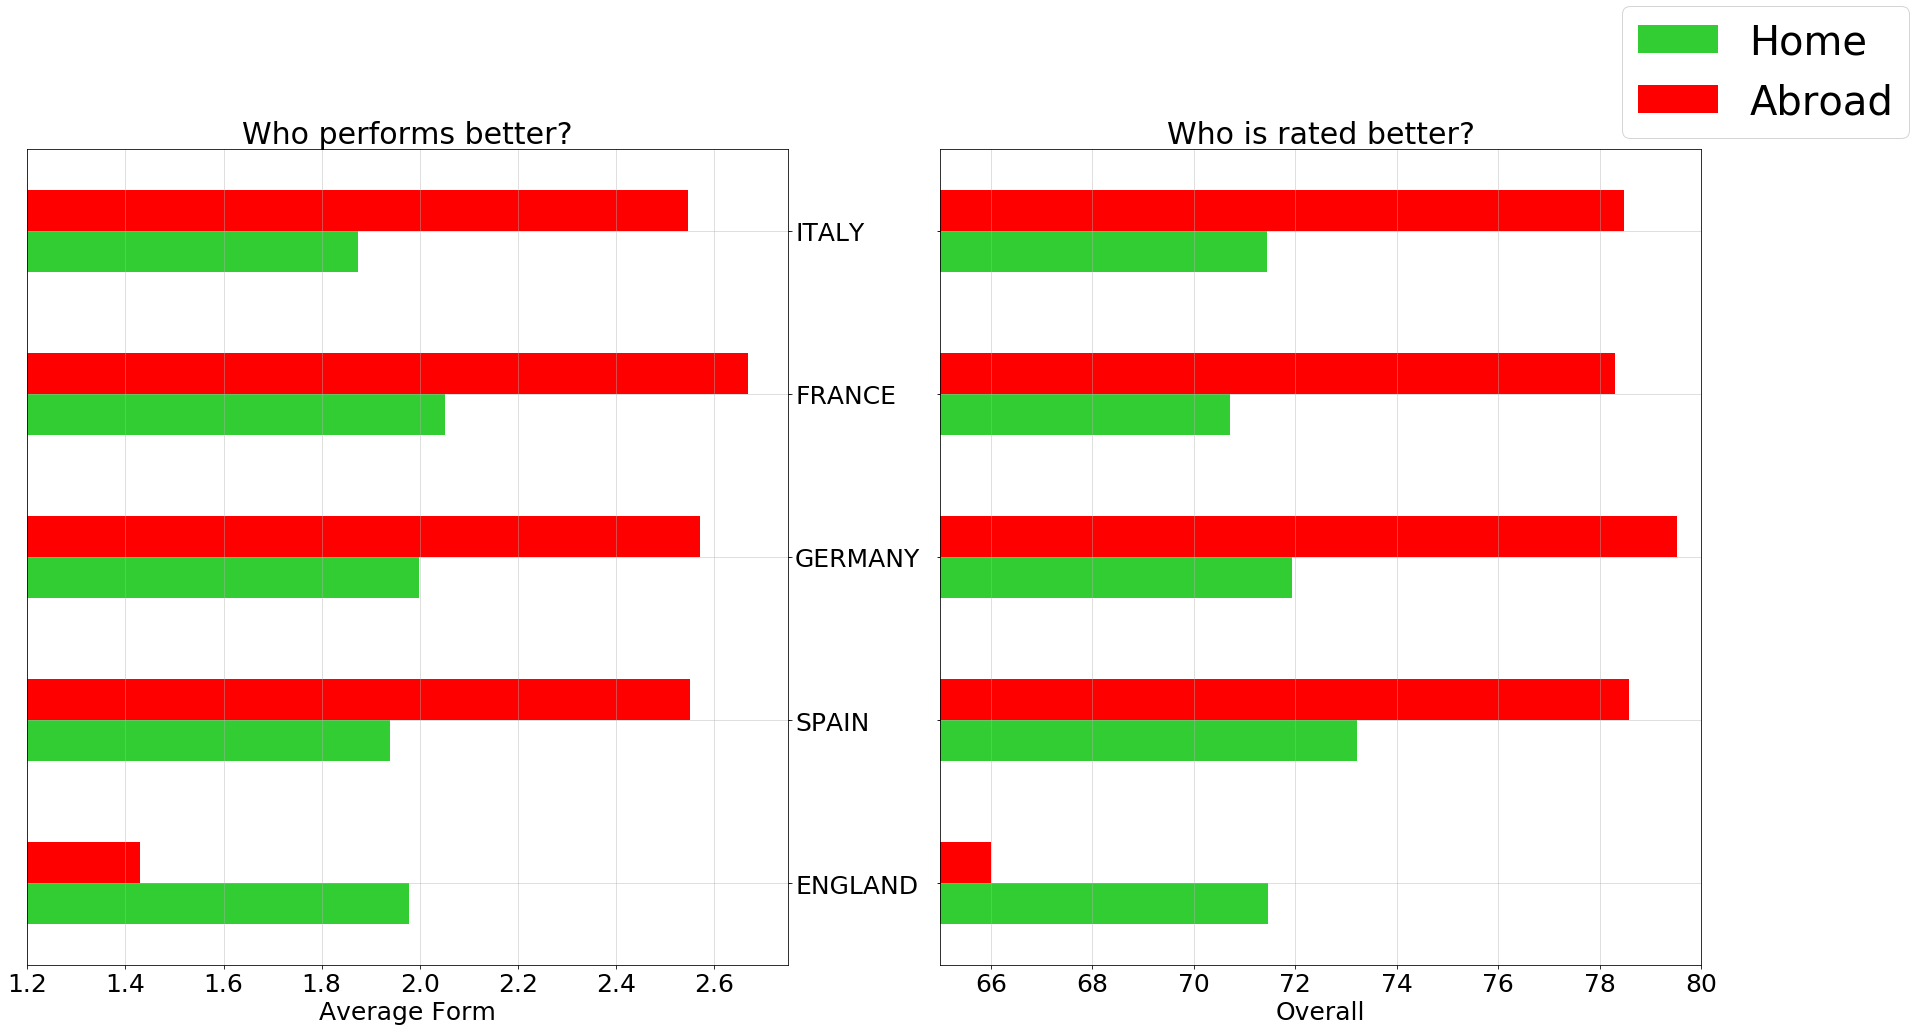

In [37]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(30,15))
ax.yaxis.tick_right()


ax2 = Overall[['Home','Abroad']].plot(ax=ax2,kind='barh',color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax2.grid(alpha=0.5)
ax2.set_ylabel("Country", fontsize=30)
ax2.set_title("Who is rated better?",fontsize= 30)
ax2.set_xlabel("Overall", fontsize=25)
ax2.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
ax2.legend(bbox_to_anchor=(1.3, 1.2, 0, 0),prop={'size':40})
ax2.set_xlim(65,80)

ax = Form[['Home','Abroad']].plot(ax=ax,kind='barh',color= ['limegreen','r'], legend=True, fontsize=20,grid=True)
ax.grid(alpha=0.5)
ax.set_xlabel("Average Form", fontsize=25)
ax.set_title("Who performs better?",fontsize= 30)
ax.set_xlim(1.2,2.75)
ax.set_yticklabels(['ENGLAND','SPAIN','GERMANY','FRANCE','ITALY'])
ax.legend_.remove()


plt.setp(ax.get_xticklabels(), fontsize=25)
plt.setp(ax2.get_xticklabels(), fontsize=25)
plt.setp(ax.get_yticklabels(), fontsize=25)



# Experimental Homegrown and Foreign Best XI
* This section has little relevance to the question but is very interesting.

**Creating dataframes for each position Homegrown and Foreign**

In [38]:
Homegrown = RQ2.loc[RQ2.Homegrown==True]
Foreign = RQ2.loc[RQ2.Homegrown==False]

Homegrown = Homegrown[Homegrown['Overall Apps'] >= 10]
Foreign = Foreign[Foreign['Overall Apps'] >= 10]

Homegrown_goalkeepers = Homegrown[Homegrown['Position']=='Goalkeeper' ]
Homegrown_defenders = Homegrown[Homegrown['Position']=='Defender']
Homegrown_midfielders = Homegrown[Homegrown['Position']=='Midfielder']
Homegrown_forwards = Homegrown[Homegrown['Position']=='Forward']

Foreign_goalkeepers = Foreign[Foreign['Position']=='Goalkeeper' ]
Foreign_defenders = Foreign[Foreign['Position']=='Defender']
Foreign_midfielders = Foreign[Foreign['Position']=='Midfielder']
Foreign_forwards = Foreign[Foreign['Position']=='Forward']

* **Sorting** each position dataframe **by Average Form**.
* Using .head() to choose the players needed to conform to the football formation **1-4-4-2**

In [39]:
Homegrown_goalkeepers = Homegrown_goalkeepers.sort_values('Average Form',ascending=False)
Homegrown_goalkeeper = Homegrown_goalkeepers.head(1)

Homegrown_defenders = Homegrown_defenders.sort_values('Average Form',ascending=False)
Homegrown_defender = Homegrown_defenders.head(4)


Homegrown_midfielders = Homegrown_midfielders.sort_values('Average Form',ascending=False)
Homegrown_midfielder = Homegrown_midfielders.head(4)


Homegrown_forwards = Homegrown_forwards.sort_values('Average Form',ascending=False)
Homegrown_forward = Homegrown_forwards.head(2)

Homegrown_XI= pd.concat([Homegrown_goalkeeper,Homegrown_defender,Homegrown_midfielder,Homegrown_forward])



Foreign_goalkeepers = Foreign_goalkeepers.sort_values('Average Form',ascending=False)
Foreign_goalkeeper = Foreign_goalkeepers.head(1)

Foreign_defenders = Foreign_defenders.sort_values('Average Form',ascending=False)
Foreign_defender = Foreign_defenders.head(4)


Foreign_midfielders = Foreign_midfielders.sort_values('Average Form',ascending=False)
Foreign_midfielder = Foreign_midfielders.head(4)


Foreign_forwards = Foreign_forwards.sort_values('Average Form',ascending=False)
Foreign_forward = Foreign_forwards.head(2)

Foreign_XI= pd.concat([Foreign_goalkeeper,Foreign_defender,Foreign_midfielder,Foreign_forward])

* Adding /1x/ to photo url to display a better image.
* Rounding Average Form to two for a cleaner look.
* Caculating the Squad Rating by finding the sum of overall's and dividing by the number of players.
* Temporarily making Overall and Average Form strings so they can be displayed in the graph with other strings

In [40]:
Homegrown_XI['photo'] = Homegrown_XI['photo'].replace('/18/','/1x/18/', regex=True)
Homegrown_XI = Homegrown_XI.reset_index()
Homegrown_XI = Homegrown_XI.drop('index',1)
Homegrown_XI['Average Form'] = Homegrown_XI['Average Form'].round(2)
Homegrown_XI['Average Form'] = Homegrown_XI['Average Form'].astype(str)
Squad_Rating = Homegrown_XI['overall'].sum()/11
Squad_Rating_H = str(Squad_Rating)
Homegrown_XI['overall'] = Homegrown_XI['overall'].astype(str)

Foreign_XI['photo'] = Foreign_XI['photo'].replace('/18/','/1x/18/', regex=True)
Foreign_XI = Foreign_XI.reset_index()
Foreign_XI = Foreign_XI.drop('index',1)
Foreign_XI['Average Form'] = Foreign_XI['Average Form'].round(2)
Foreign_XI['Average Form'] = Foreign_XI['Average Form'].astype(str)
Squad_Rating = Foreign_XI['overall'].sum()/11
Squad_Rating_F = str(Squad_Rating)
Foreign_XI['overall'] = Foreign_XI['overall'].astype(str)

**Creating the Homegrown XI**
* Changing the column of photos to a float breaking down each image
* Reading in each photo with mpimg.imread

In [41]:
JoinedHomegrownImages = Homegrown_XI['photo'].as_matrix()

GK1 = mpimg.imread(JoinedHomegrownImages[0])
DF1 = mpimg.imread(JoinedHomegrownImages[1])
DF2 = mpimg.imread(JoinedHomegrownImages[2])
DF3 = mpimg.imread(JoinedHomegrownImages[3])
DF4 = mpimg.imread(JoinedHomegrownImages[4])
MD1 = mpimg.imread(JoinedHomegrownImages[5])
MD2 = mpimg.imread(JoinedHomegrownImages[6])
MD3 = mpimg.imread(JoinedHomegrownImages[7])
MD4 = mpimg.imread(JoinedHomegrownImages[8])
FW1 = mpimg.imread(JoinedHomegrownImages[9])
FW2 = mpimg.imread(JoinedHomegrownImages[10])

## Homegrown XI

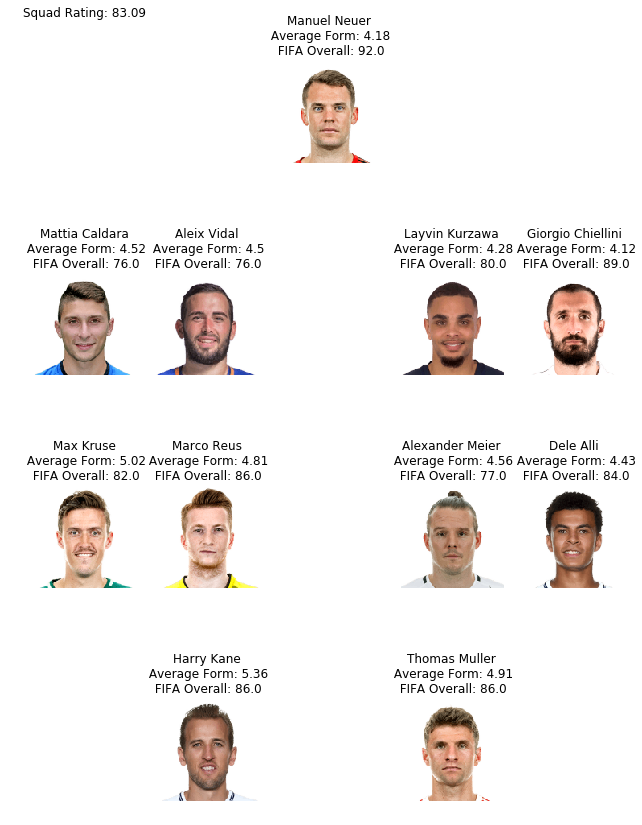

In [42]:
mpl.rcParams['font.size'] = 10
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating_H[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(Homegrown_XI['Players'].loc[0] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(Homegrown_XI['Players'].loc[1] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[1] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(Homegrown_XI['Players'].loc[2] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[2] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[ 2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(Homegrown_XI['Players'].loc[3] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[3] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(Homegrown_XI['Players'].loc[4] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[4] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(Homegrown_XI['Players'].loc[5] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[5] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(Homegrown_XI['Players'].loc[6] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[6] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(Homegrown_XI['Players'].loc[7] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[7] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(Homegrown_XI['Players'].loc[8] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[8] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(Homegrown_XI['Players'].loc[9] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[9] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(Homegrown_XI['Players'].loc[10] + '\n' + ' Average Form: ' + Homegrown_XI['Average Form'].loc[10] + '\n' + ' FIFA Overall: ' + Homegrown_XI['overall'].loc[10])
axarr[3,5].axis('off')

f.savefig('../../data/analysis/Homegrown_XI.png')

**Creating the Foreign XI**
* Changing the column of photos to a float breaking down each image
* Reading in each photo with mpimg.imread

In [43]:
JoinedForeignImages = Foreign_XI['photo'].as_matrix()

GK1 = mpimg.imread(JoinedForeignImages[0])
DF1 = mpimg.imread(JoinedForeignImages[1])
DF2 = mpimg.imread(JoinedForeignImages[2])
DF3 = mpimg.imread(JoinedForeignImages[3])
DF4 = mpimg.imread(JoinedForeignImages[4])
MD1 = mpimg.imread(JoinedForeignImages[5])
MD2 = mpimg.imread(JoinedForeignImages[6])
MD3 = mpimg.imread(JoinedForeignImages[7])
MD4 = mpimg.imread(JoinedForeignImages[8])
FW1 = mpimg.imread(JoinedForeignImages[9])
FW2 = mpimg.imread(JoinedForeignImages[10])

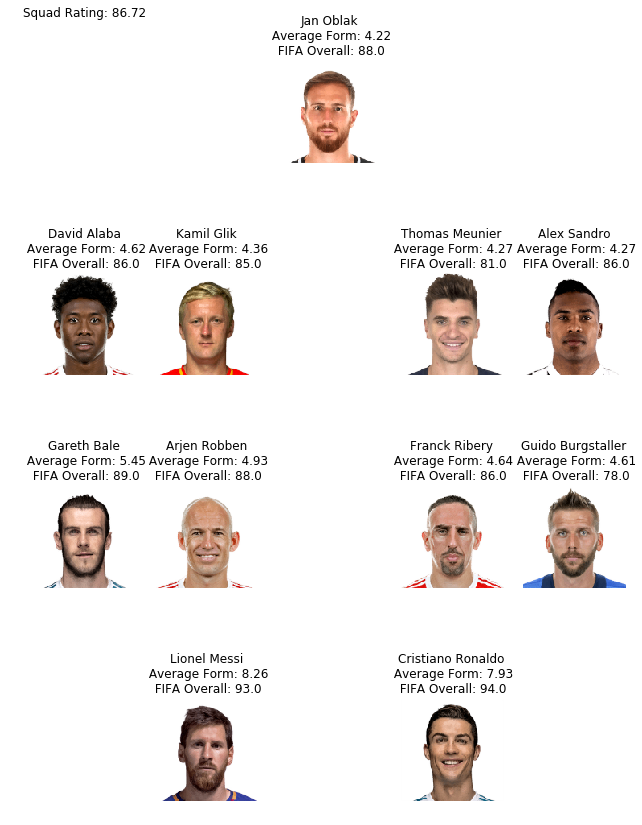

In [44]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating_F[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(Foreign_XI['Players'].loc[0] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(Foreign_XI['Players'].loc[1] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[1] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(Foreign_XI['Players'].loc[2] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[2] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[ 2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(Foreign_XI['Players'].loc[3] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[3] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(Foreign_XI['Players'].loc[4] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[4] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(Foreign_XI['Players'].loc[5] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[5] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(Foreign_XI['Players'].loc[6] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[6] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(Foreign_XI['Players'].loc[7] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[7] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(Foreign_XI['Players'].loc[8] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[8] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(Foreign_XI['Players'].loc[9] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[9] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(Foreign_XI['Players'].loc[10] + '\n' + ' Average Form: ' + Foreign_XI['Average Form'].loc[10] + '\n' + ' FIFA Overall: ' + Foreign_XI['overall'].loc[10])
axarr[3,5].axis('off')

f.savefig('../../data/analysis/Foreign_XI.png')

## Home/Abroad XI
* The Home XI that would be represented would be the exact same as the Homegrown XI so we have left it out

In [45]:
Abroad = RQ2.loc[RQ2['Abroad']==True]
Abroad = Abroad[Abroad['Overall Apps'] >= 10]

**This block of code is a repeated version of the Homegrown and Foreign XI's and does the following:**
* Sortings each position dataframe by Average Form.
* Uses .head() to choose the players needed to conform to the football formation **1-4-4-2**
* Adds /1x/ to photo url to display a better image.
* Rounds Average Form to two for a cleaner look.
* Caculates the Squad Rating by finding the sum of overall's and dividing by the number of players.
* Temporarily makes Overall and Average Form strings so they can be displayed in the graph with other strings.
* Changing the column of photos to a float breaking down each image.
* Reading in each photo with mpimg.imread.

In [46]:
Abroad_goalkeepers = Abroad[Abroad['Position']=='Goalkeeper' ]
Abroad_defenders = Abroad[Abroad['Position']=='Defender']
Abroad_midfielders = Abroad[Abroad['Position']=='Midfielder']
Abroad_forwards = Abroad[Abroad['Position']=='Forward']


Abroad_goalkeepers = Abroad_goalkeepers.sort_values('Average Form',ascending=False)
Abroad_goalkeeper = Abroad_goalkeepers.head(1)

Abroad_defenders = Abroad_defenders.sort_values('Average Form',ascending=False)
Abroad_defender = Abroad_defenders.head(4)


Abroad_midfielders = Abroad_midfielders.sort_values('Average Form',ascending=False)
Abroad_midfielder = Abroad_midfielders.head(4)


Abroad_forwards = Abroad_forwards.sort_values('Average Form',ascending=False)
Abroad_forward = Abroad_forwards.head(2)

Abroad_XI= pd.concat([Abroad_goalkeeper,Abroad_defender,Abroad_midfielder,Abroad_forward])

Abroad_XI['photo'] = Abroad_XI['photo'].replace('/18/','/1x/18/', regex=True)
Abroad_XI = Abroad_XI.reset_index()
Abroad_XI = Abroad_XI.drop('index',1)
Abroad_XI['Average Form'] = Abroad_XI['Average Form'].round(2)
Abroad_XI['Average Form'] = Abroad_XI['Average Form'].astype(str)
Squad_Rating = Abroad_XI['overall'].sum()/11
Squad_Rating_F = str(Squad_Rating)
Abroad_XI['overall'] = Abroad_XI['overall'].astype(str)

JoinedAbroadImages = Abroad_XI['photo'].as_matrix()

GK1 = mpimg.imread(JoinedAbroadImages[0])
DF1 = mpimg.imread(JoinedAbroadImages[1])
DF2 = mpimg.imread(JoinedAbroadImages[2])
DF3 = mpimg.imread(JoinedAbroadImages[3])
DF4 = mpimg.imread(JoinedAbroadImages[4])
MD1 = mpimg.imread(JoinedAbroadImages[5])
MD2 = mpimg.imread(JoinedAbroadImages[6])
MD3 = mpimg.imread(JoinedAbroadImages[7])
MD4 = mpimg.imread(JoinedAbroadImages[8])
FW1 = mpimg.imread(JoinedAbroadImages[9])
FW2 = mpimg.imread(JoinedAbroadImages[10])

## Abroad XI

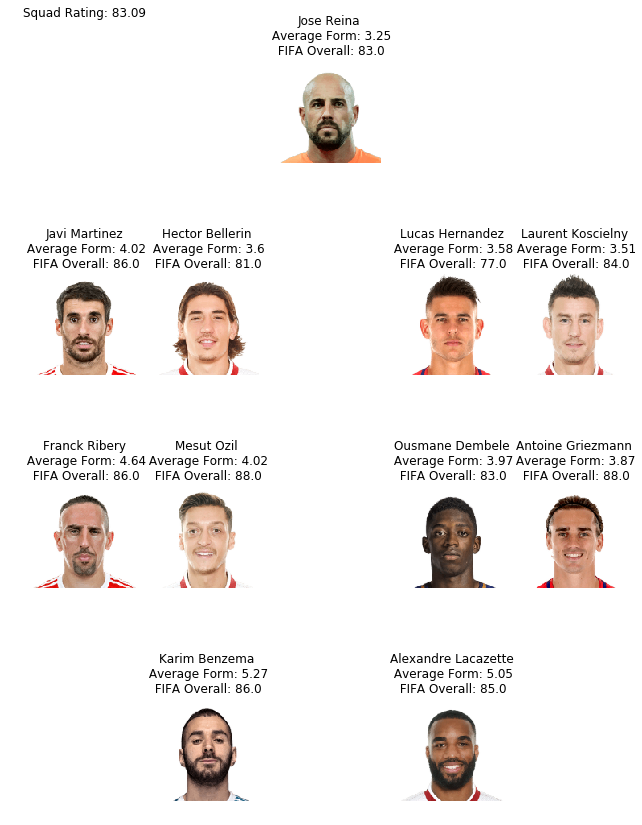

In [47]:
mpl.rcParams['font.size'] = 10
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating_H[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(Abroad_XI['Players'].loc[0] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[0] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(Abroad_XI['Players'].loc[1] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[1] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(Abroad_XI['Players'].loc[2] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[2] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[ 2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(Abroad_XI['Players'].loc[3] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[3] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(Abroad_XI['Players'].loc[4] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[4] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(Abroad_XI['Players'].loc[5] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[5] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(Abroad_XI['Players'].loc[6] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[6] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(Abroad_XI['Players'].loc[7] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[7] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(Abroad_XI['Players'].loc[8] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[8] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(Abroad_XI['Players'].loc[9] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[9] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(Abroad_XI['Players'].loc[10] + '\n' + ' Average Form: ' + Abroad_XI['Average Form'].loc[10] + '\n' + ' FIFA Overall: ' + Abroad_XI['overall'].loc[10])
axarr[3,5].axis('off')

f.savefig('../../data/analysis/Abroad_XI.png')